# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Reading in data

In [2]:
is_data_file_adj = False

# Try reading in the adjusted price file
try:
    resale_data = pd.read_csv('./raw_data/hdb_resale_prices_adj_2018.csv')
    is_data_file_adj = True
except:
    resale_data = pd.read_csv('./raw_data/jan_1990_to_feb_2018.csv') 
    resale_price_index = pd.read_csv('./raw_data/resale_price_index.csv')

In [37]:
resale_data.head()

Unnamed: 0  month        town flat_type block       street_name  \
0           0      1  ANG MO KIO    5 ROOM   101  ANG MO KIO AVE 3   
1           1      1  ANG MO KIO    4 ROOM   103  ANG MO KIO AVE 3   
2           2      1  ANG MO KIO    4 ROOM   105  ANG MO KIO AVE 4   
3           3      1  ANG MO KIO    3 ROOM   110  ANG MO KIO AVE 4   
4           4      1  ANG MO KIO    3 ROOM   117  ANG MO KIO AVE 4   

  storey_range  floor_area_sqm      flat_model  lease_commence_date  \
0     07 TO 09             117        STANDARD                 1978   
1     07 TO 09              90  NEW GENERATION                 1978   
2     04 TO 06              92  NEW GENERATION                 1978   
3     10 TO 12              67  NEW GENERATION                 1978   
4     04 TO 06              74  NEW GENERATION                 1978   

   resale_price  year  2018_price_value  psf_price_adj_2018  
0        118000  1990     639045.267490          507.429962  
1         64500  1990     349308.641975          360.576290  
2         72500  1990     392633.744856          396.488085  
3         34000  1990     184131.687243          255.319553  
4         37000  1990     200378.600823          251.564854

# Cleaning the data

## Splitting the date into 'year' and 'month'

In [3]:
if (not(is_data_file_adj)):
    resale_data['year'] = resale_data['month'].apply(lambda x: int(x.split('-')[0]))

In [4]:
if (not(is_data_file_adj)):
    resale_data['month'] = resale_data['month'].apply(lambda x: int(x.split('-')[1]))

## Converting the relevant columns to integers / float

In [5]:
resale_data['floor_area_sqm'] = resale_data['floor_area_sqm'].apply(lambda x: int(x))
resale_data['lease_commence_date'] = resale_data['lease_commence_date'].apply(lambda x: int(x))
resale_data['resale_price'] = resale_data['resale_price'].apply(lambda x: int(x))
resale_data['2018_price_value'] = resale_data['2018_price_value'].apply(lambda x: float(x))
resale_data['psf_price_adj_2018'] = resale_data['psf_price_adj_2018'].apply(lambda x: float(x))

## Converting all entries in 'flat_model' column to uppercase

In [6]:
if (not(is_data_file_adj)):
    resale_data['flat_model'] = resale_data['flat_model'].apply(lambda x: x.upper())

## Remove the '-' in 'Multi-Generation' for 'flat_type'

In [7]:
if (not(is_data_file_adj)):
    resale_data['flat_type'] = resale_data['flat_type'].apply(lambda x: x.replace('-', ' '))

## Average resale price by town for the past 7 years

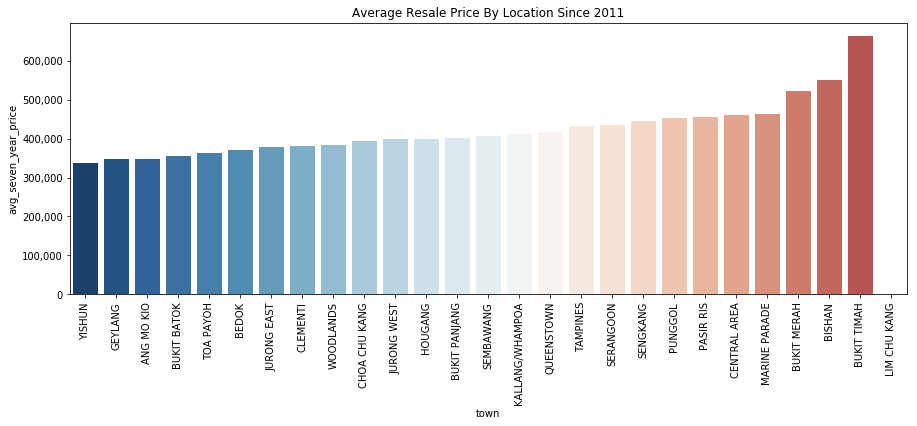

In [25]:
if (not(is_data_file_adj)):
    all_towns = set(list(resale_data['town'].values))

    avg_seven_year_resale_price = pd.DataFrame(columns=['town', 'avg_seven_year_price'])

    for each_town in all_towns:
        avg_seven_year_price_for_town = resale_data.loc[(resale_data['town'] == each_town) & (resale_data['year'] >= 2011)]['2018_price_value'].median()
        _temp_df = pd.DataFrame([[each_town, avg_seven_year_price_for_town]], columns=['town', 'avg_seven_year_price'])
        avg_seven_year_resale_price = avg_seven_year_resale_price.append(_temp_df)

    avg_seven_year_resale_price.sort_values(by=['avg_seven_year_price'], inplace=True)    

    fig, axs = plt.subplots(figsize=(15,5))
    axs.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
    )
    x = sns.barplot(x=avg_seven_year_resale_price['town'], y=avg_seven_year_resale_price['avg_seven_year_price'], data=avg_seven_year_resale_price, palette=sns.color_palette('RdBu_r', 30)).set_title('Average Resale Price By Location Since 2011')
    for item in axs.get_xticklabels():
        item.set_rotation(90)
        
else:
    all_towns = set(list(resale_data['town'].values))

    avg_seven_year_resale_price = pd.DataFrame(columns=['town', 'avg_seven_year_price'])

    for each_town in all_towns:
        avg_seven_year_price_for_town = resale_data.loc[(resale_data['town'] == each_town) & (resale_data['year'] >= 2011)]['2018_price_value'].median()
        _temp_df = pd.DataFrame([[each_town, avg_seven_year_price_for_town]], columns=['town', 'avg_seven_year_price'])
        avg_seven_year_resale_price = avg_seven_year_resale_price.append(_temp_df)

    avg_seven_year_resale_price.sort_values(by=['avg_seven_year_price'], inplace=True)    

    fig, axs = plt.subplots(figsize=(15,5))
    axs.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
    )
    x = sns.barplot(x=avg_seven_year_resale_price['town'], y=avg_seven_year_resale_price['avg_seven_year_price'], data=avg_seven_year_resale_price, palette=sns.color_palette('RdBu_r', 30)).set_title('Average Resale Price By Location Since 2011')
    for item in axs.get_xticklabels():
        item.set_rotation(90)

## Average resale prices in 2018 by town

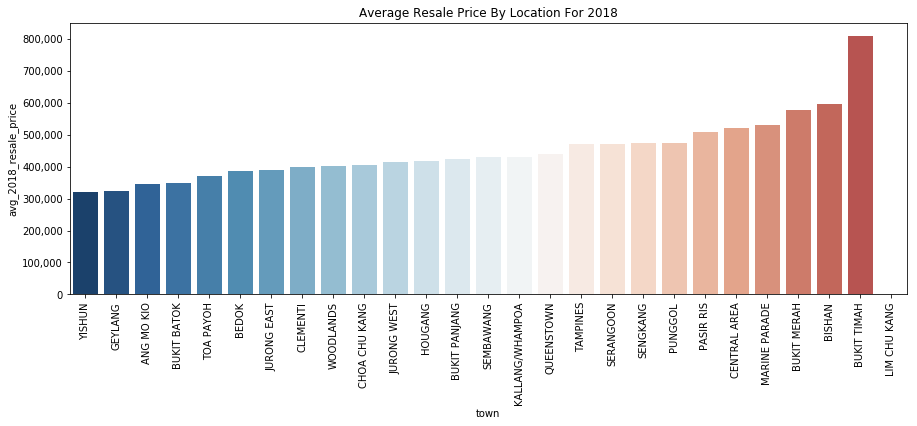

In [29]:
if (is_data_file_adj):
    all_towns = set(list(resale_data['town'].values))

    avg_resale_price = pd.DataFrame(columns=['town', 'avg_2018_resale_price'])

    for each_town in all_towns:
        avg_resale_price_for_town = resale_data.loc[(resale_data['town'] == each_town) & (resale_data['year'] == 2018)]['2018_price_value'].median()
        _temp_df = pd.DataFrame([[each_town, avg_resale_price_for_town]], columns=['town', 'avg_2018_resale_price'])
        avg_resale_price = avg_resale_price.append(_temp_df)

    avg_resale_price.sort_values(by=['avg_2018_resale_price'], inplace=True)    

    fig, axs = plt.subplots(figsize=(15,5))
    axs.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
    )
    x = sns.barplot(x=avg_seven_year_resale_price['town'], y=avg_resale_price['avg_2018_resale_price'], data=avg_resale_price, palette=sns.color_palette('RdBu_r', 30)).set_title('Average Resale Price By Location For 2018')
    for item in axs.get_xticklabels():
        item.set_rotation(90)

## Adjust resale prices into 2018 present day value

In [9]:
def adj_present_day_price(each_row):
    resale_year = each_row['year']
    resale_mth = each_row['month']
    index_qtr = None
    
    if (resale_year != 2018):
        if ((resale_mth >= 1) and (resale_mth <= 3)):
            index_qtr = 'Q1'
        elif ((resale_mth >= 4) and (resale_mth <= 6)):
            index_qtr = 'Q2'
        elif ((resale_mth >= 7) and (resale_mth <=9)):
            index_qtr = 'Q3'
        else:
            index_qtr = 'Q4'

        orig_year_index = resale_price_index.loc[(resale_price_index['year'] == resale_year) & (resale_price_index['qtr'] == index_qtr)]['index'].values[0]

        each_row['2018_price_value'] = (each_row['resale_price'] / orig_year_index) * (resale_price_index.loc[(resale_price_index['year'] == 2018) & (resale_price_index['qtr'] == 'Q1')]['index']).values[0]
    else:
        each_row['2018_price_value'] = each_row['resale_price']
    
    return each_row

In [10]:
if (not(is_data_file_adj)):
    resale_data['2018_price_value'] = 0

    resale_data = resale_data.apply(adj_present_day_price, axis=1)

## Calculate the per square FOOT price of a unit

In [11]:
def psf_price(each_row):
    adj_price = each_row['2018_price_value']
    sq_feet = each_row['floor_area_sqm'] * 10.7639
    
    each_row['psf_price_adj_2018'] = adj_price / sq_feet
    
    return each_row

In [12]:
if (not(is_data_file_adj)):
    resale_data['psf_price_adj_2018'] = 0

    resale_data = resale_data.apply(psf_price, axis=1)

## Export the update resale data

In [13]:
if (not(is_data_file_adj)):
    # Export it to CSV
    resale_data.to_csv('./raw_data/hdb_resale_prices_adj_2018.csv', index=False)

## Average per square foot price in present day (2018) value for 1 room flats from 2011

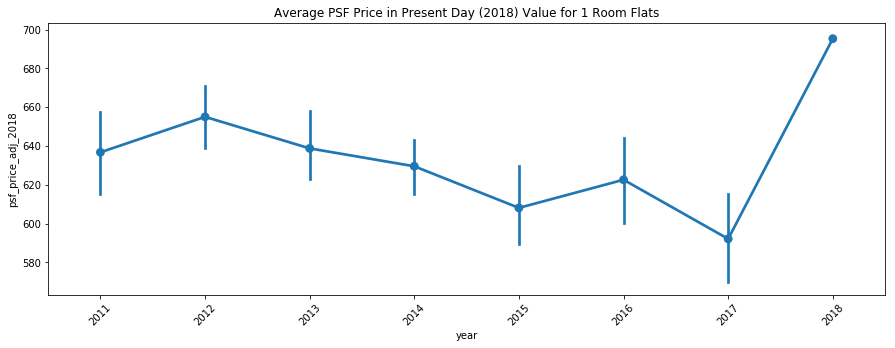

In [14]:
_adj_data = (resale_data.loc[(resale_data['flat_type'] == '1 ROOM') & (resale_data['year'] >= 2011)]).sort_values(by=['psf_price_adj_2018']).reset_index()

fig, axs = plt.subplots(figsize=(15,5))
x = sns.pointplot(x=_adj_data['year'], y=_adj_data['psf_price_adj_2018'], data=_adj_data).set_title('Average PSF Price in Present Day (2018) Value for 1 Room Flats')
for item in axs.get_xticklabels():
    item.set_rotation(45)

## Average per square foot price in present day (2018) value for 2 room flats by town from 2011

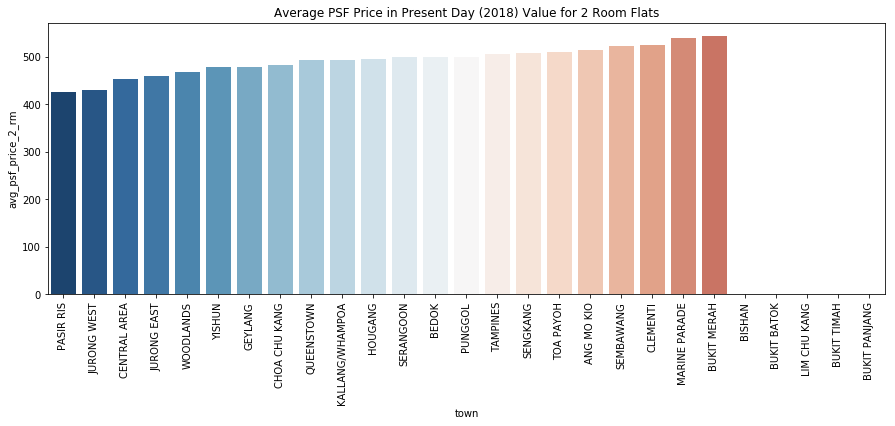

In [15]:
avg_psf_price_2_rm_by_town = pd.DataFrame(columns=['town', 'avg_psf_price_2_rm'])

for each_town in all_towns:
    avg_psf_price_2_rm_for_town = resale_data.loc[(resale_data['town'] == each_town) & (resale_data['year'] >= 2011) & (resale_data['flat_type'] == '2 ROOM')]['psf_price_adj_2018'].median()
    _temp_df = pd.DataFrame([[each_town, avg_psf_price_2_rm_for_town]], columns=['town', 'avg_psf_price_2_rm'])
    avg_psf_price_2_rm_by_town = avg_psf_price_2_rm_by_town.append(_temp_df)

avg_psf_price_2_rm_by_town.sort_values(by=['avg_psf_price_2_rm'], inplace=True)  

fig, axs = plt.subplots(figsize=(15,5))
x = sns.barplot(x='town', y='avg_psf_price_2_rm', data=avg_psf_price_2_rm_by_town, palette=sns.color_palette('RdBu_r', len(set(avg_psf_price_2_rm_by_town['town'])))).set_title('Average PSF Price in Present Day (2018) Value for 2 Room Flats')
for item in axs.get_xticklabels():
    item.set_rotation(90)

## Average per square foot price in present day (2018) value for 3 room flats by town from 2011

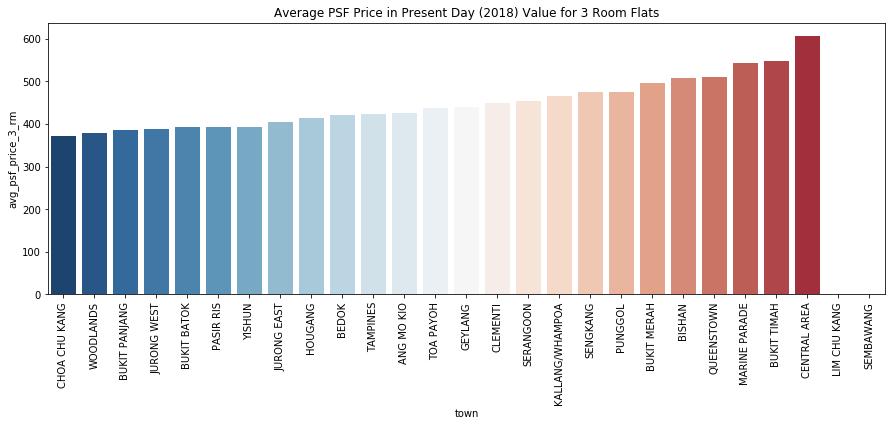

In [16]:
avg_psf_price_3_rm_by_town = pd.DataFrame(columns=['town', 'avg_psf_price_3_rm'])

for each_town in all_towns:
    avg_psf_price_3_rm_for_town = resale_data.loc[(resale_data['town'] == each_town) & (resale_data['year'] >= 2011) & (resale_data['flat_type'] == '3 ROOM')]['psf_price_adj_2018'].median()
    _temp_df = pd.DataFrame([[each_town, avg_psf_price_3_rm_for_town]], columns=['town', 'avg_psf_price_3_rm'])
    avg_psf_price_3_rm_by_town = avg_psf_price_3_rm_by_town.append(_temp_df)

avg_psf_price_3_rm_by_town.sort_values(by=['avg_psf_price_3_rm'], inplace=True)

fig, axs = plt.subplots(figsize=(15,5))
x = sns.barplot(x='town', y='avg_psf_price_3_rm', data=avg_psf_price_3_rm_by_town, palette=sns.color_palette('RdBu_r', len(set(avg_psf_price_3_rm_by_town['town'])))).set_title('Average PSF Price in Present Day (2018) Value for 3 Room Flats')
for item in axs.get_xticklabels():
    item.set_rotation(90)

## Average per square foot price in present day (2018) value for 4 room flats by town from 2011

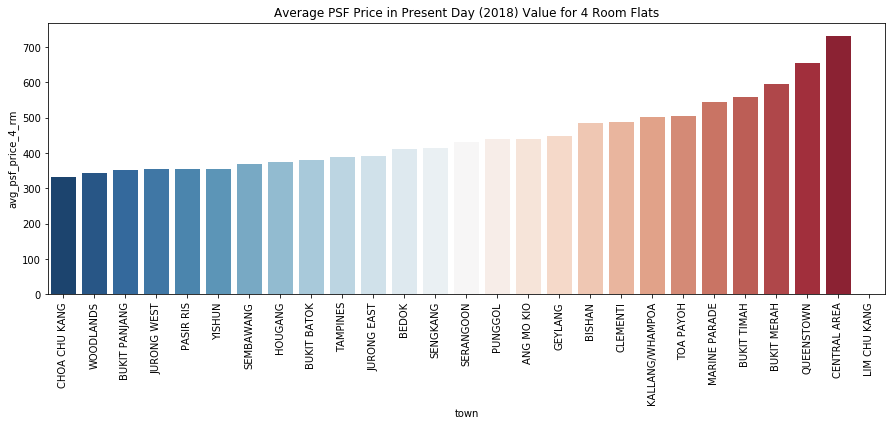

In [17]:
avg_psf_price_4_rm_by_town = pd.DataFrame(columns=['town', 'avg_psf_price_4_rm'])

for each_town in all_towns:
    avg_psf_price_4_rm_for_town = resale_data.loc[(resale_data['town'] == each_town) & (resale_data['year'] >= 2011) & (resale_data['flat_type'] == '4 ROOM')]['psf_price_adj_2018'].median()
    _temp_df = pd.DataFrame([[each_town, avg_psf_price_4_rm_for_town]], columns=['town', 'avg_psf_price_4_rm'])
    avg_psf_price_4_rm_by_town = avg_psf_price_4_rm_by_town.append(_temp_df)

avg_psf_price_4_rm_by_town.sort_values(by=['avg_psf_price_4_rm'], inplace=True)

fig, axs = plt.subplots(figsize=(15,5))
x = sns.barplot(x='town', y='avg_psf_price_4_rm', data=avg_psf_price_4_rm_by_town, palette=sns.color_palette('RdBu_r', len(set(avg_psf_price_4_rm_by_town['town'])))).set_title('Average PSF Price in Present Day (2018) Value for 4 Room Flats')
for item in axs.get_xticklabels():
    item.set_rotation(90)

## Average per square foot price in present day (2018) value for 5 room flats by town from 2011

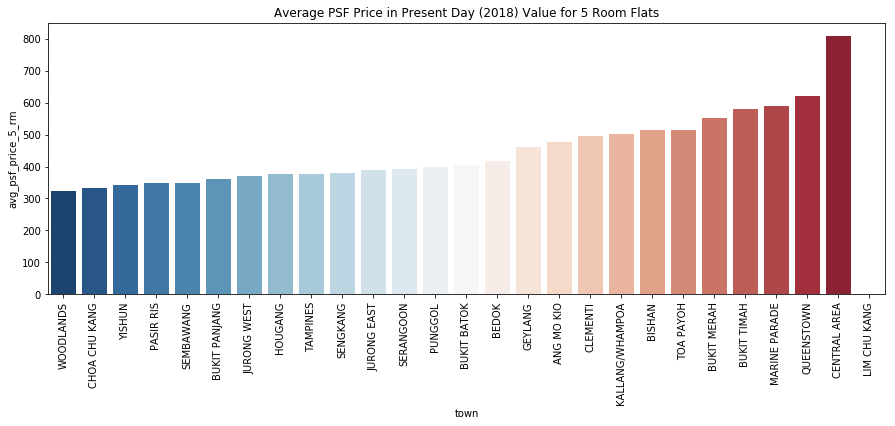

In [18]:
avg_psf_price_5_rm_by_town = pd.DataFrame(columns=['town', 'avg_psf_price_5_rm'])

for each_town in all_towns:
    avg_psf_price_5_rm_for_town = resale_data.loc[(resale_data['town'] == each_town) & (resale_data['year'] >= 2011) & (resale_data['flat_type'] == '5 ROOM')]['psf_price_adj_2018'].median()
    _temp_df = pd.DataFrame([[each_town, avg_psf_price_5_rm_for_town]], columns=['town', 'avg_psf_price_5_rm'])
    avg_psf_price_5_rm_by_town = avg_psf_price_5_rm_by_town.append(_temp_df)

avg_psf_price_5_rm_by_town.sort_values(by=['avg_psf_price_5_rm'], inplace=True)

fig, axs = plt.subplots(figsize=(15,5))
x = sns.barplot(x='town', y='avg_psf_price_5_rm', data=avg_psf_price_5_rm_by_town, palette=sns.color_palette('RdBu_r', len(set(avg_psf_price_5_rm_by_town['town'])))).set_title('Average PSF Price in Present Day (2018) Value for 5 Room Flats')
for item in axs.get_xticklabels():
    item.set_rotation(90)

## Average per square foot price in present day (2018) value by town from 2011

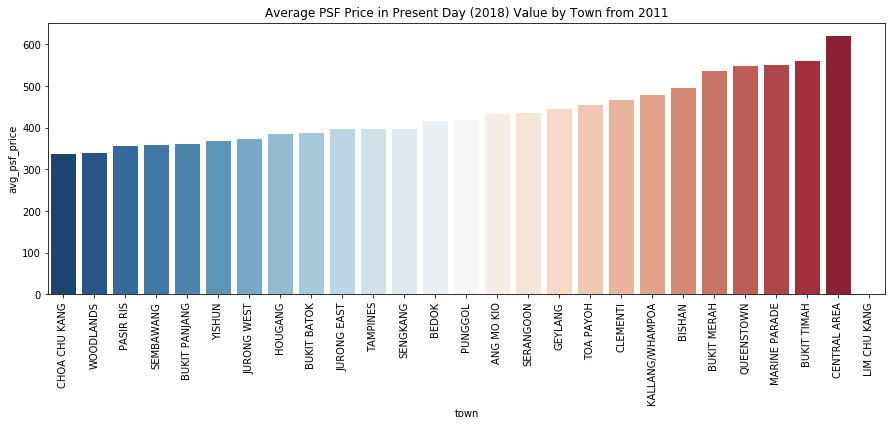

In [19]:
avg_psf_price_by_town = pd.DataFrame(columns=['town', 'avg_psf_price'])

for each_town in all_towns:
    avg_psf_price_for_town = resale_data.loc[(resale_data['town'] == each_town) & (resale_data['year'] >= 2011)]['psf_price_adj_2018'].median()
    _temp_df = pd.DataFrame([[each_town, avg_psf_price_for_town]], columns=['town', 'avg_psf_price'])
    avg_psf_price_by_town = avg_psf_price_by_town.append(_temp_df)

avg_psf_price_by_town.sort_values(by=['avg_psf_price'], inplace=True)

fig, axs = plt.subplots(figsize=(15,5))
x = sns.barplot(x='town', y='avg_psf_price', data=avg_psf_price_by_town, palette=sns.color_palette('RdBu_r', len(set(avg_psf_price_by_town['town'])))).set_title('Average PSF Price in Present Day (2018) Value by Town from 2011')
for item in axs.get_xticklabels():
    item.set_rotation(90)

## Average PSF price in present day (2018) value for each room type in each town, in 2018

c:\users\nelgoh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


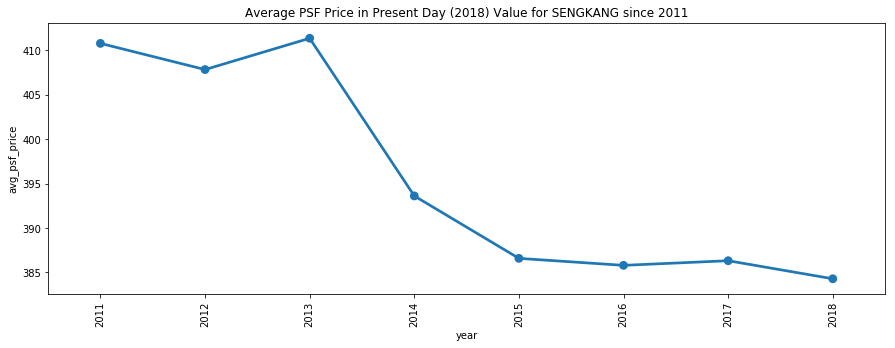

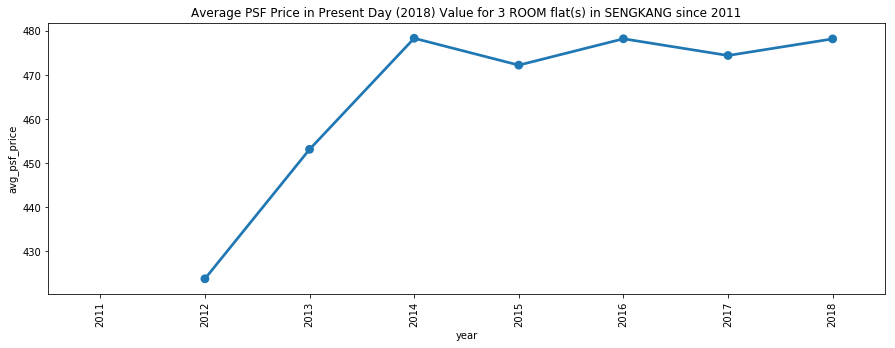

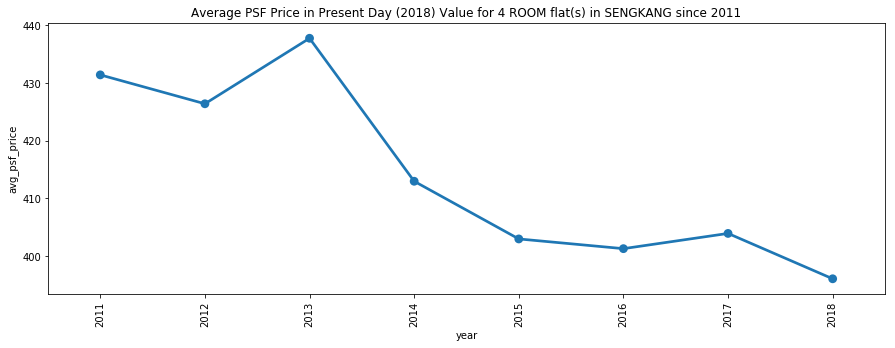

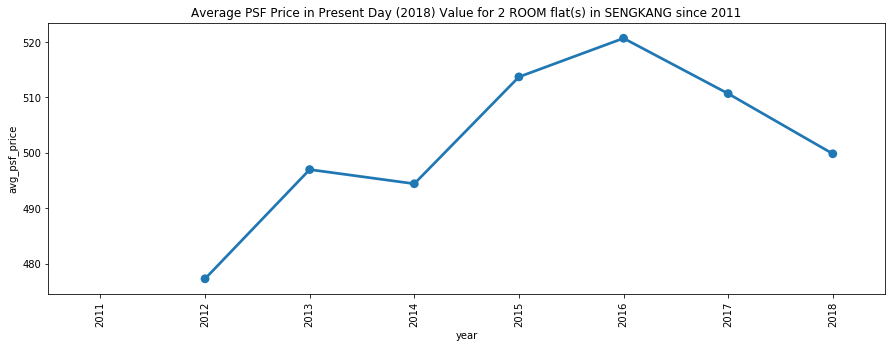

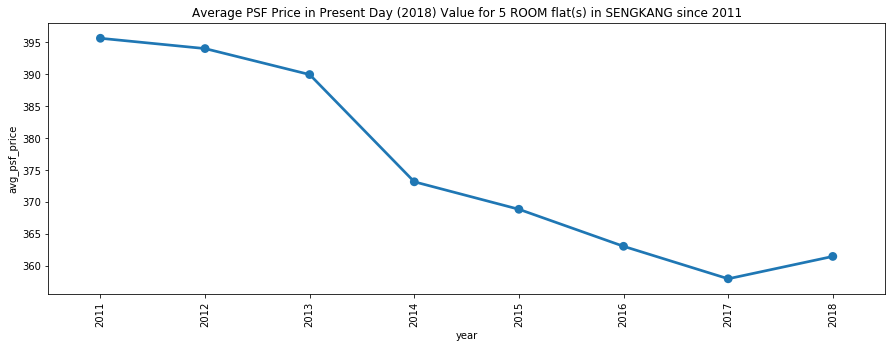

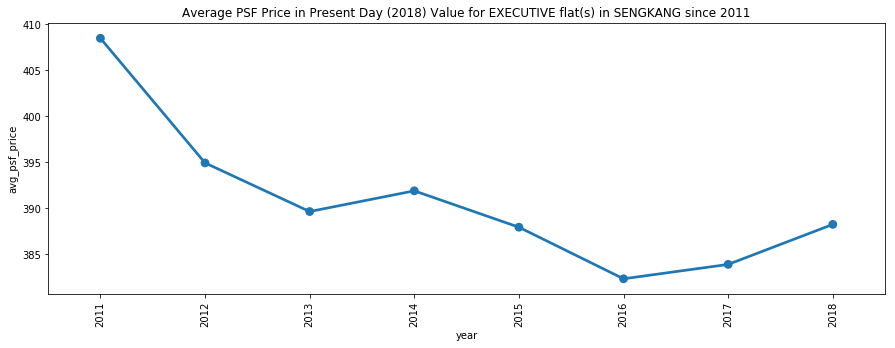

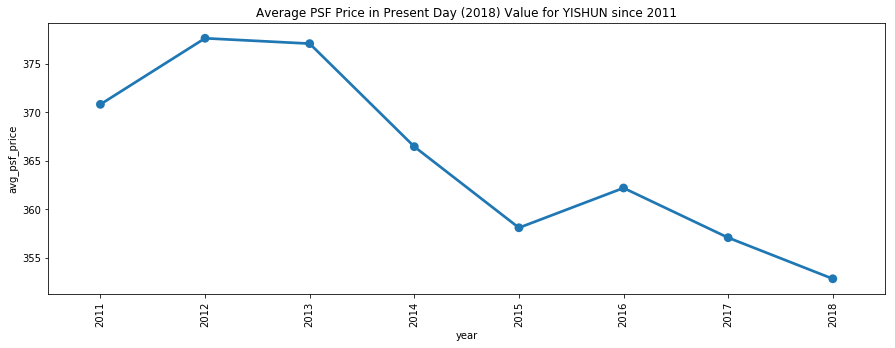

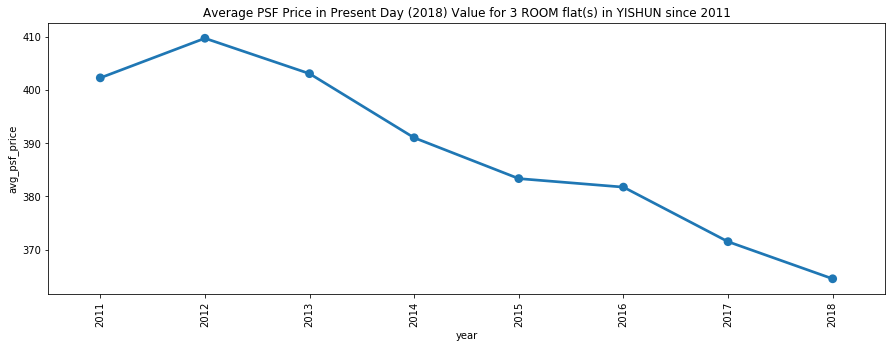

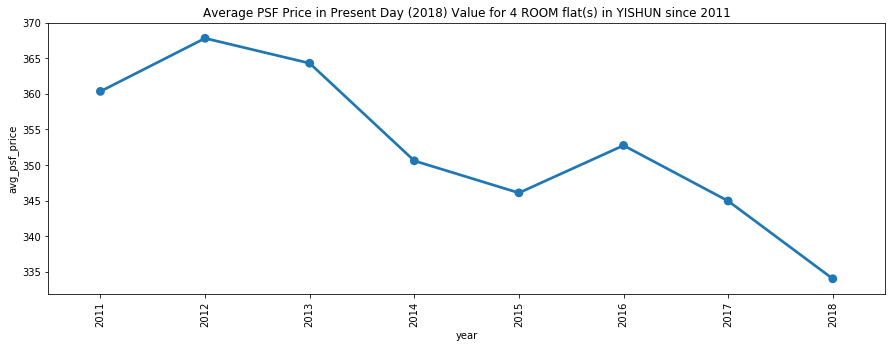

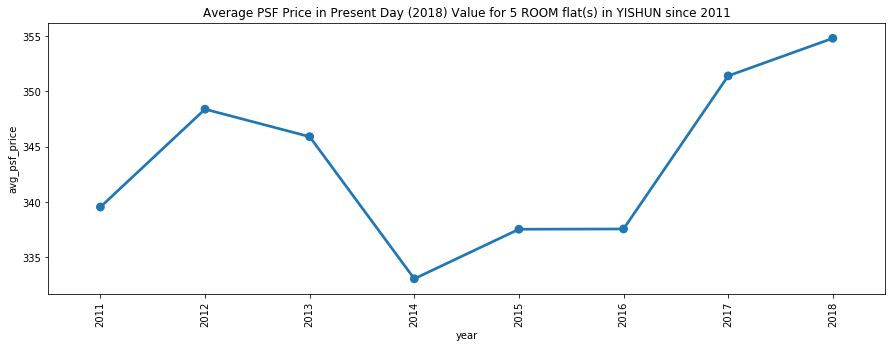

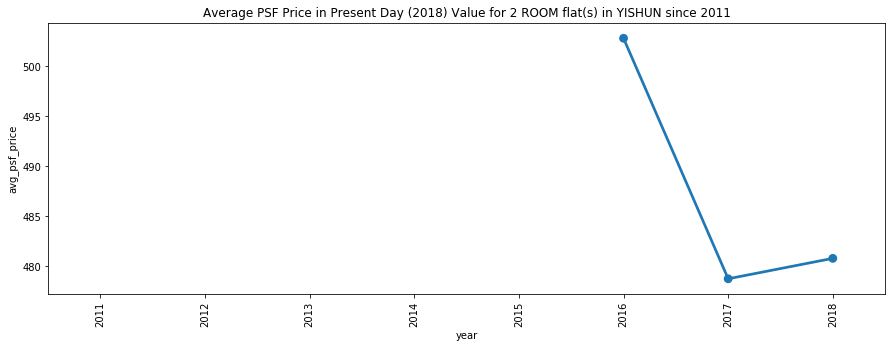

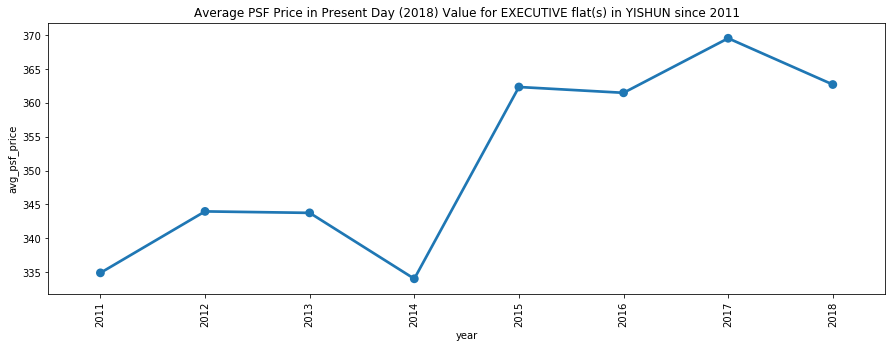

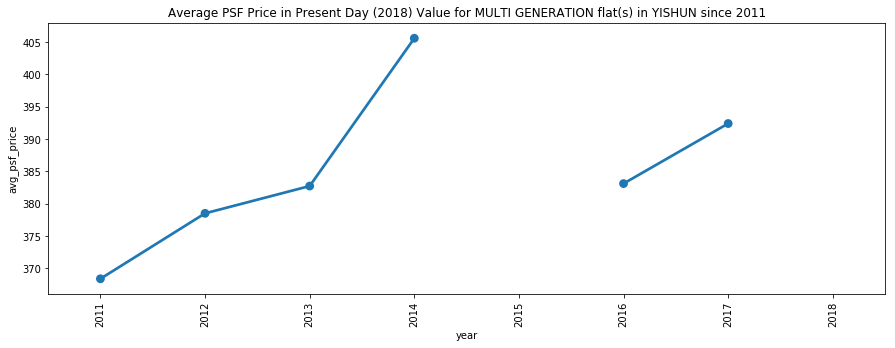

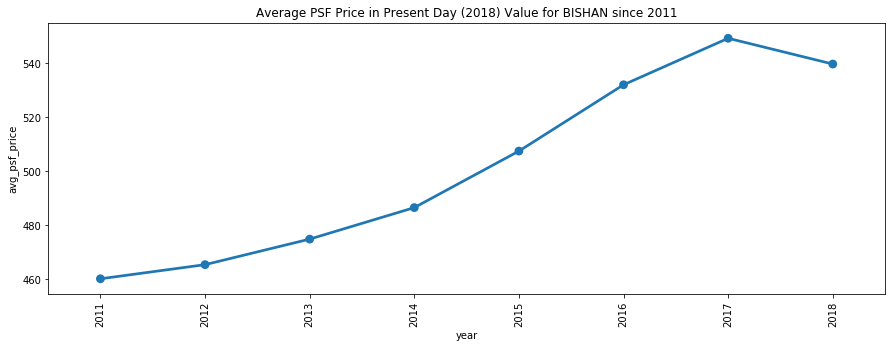

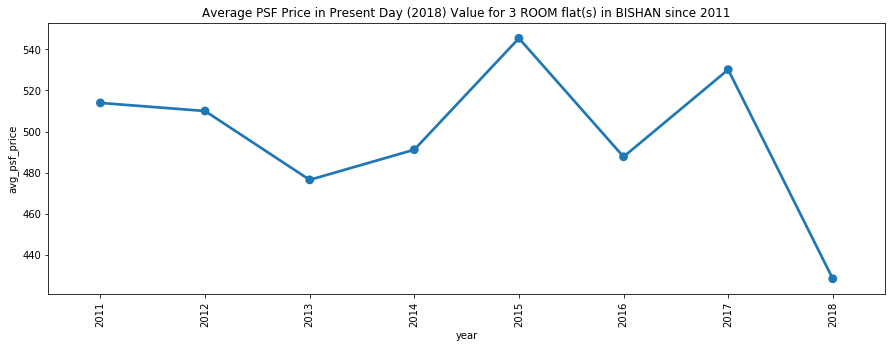

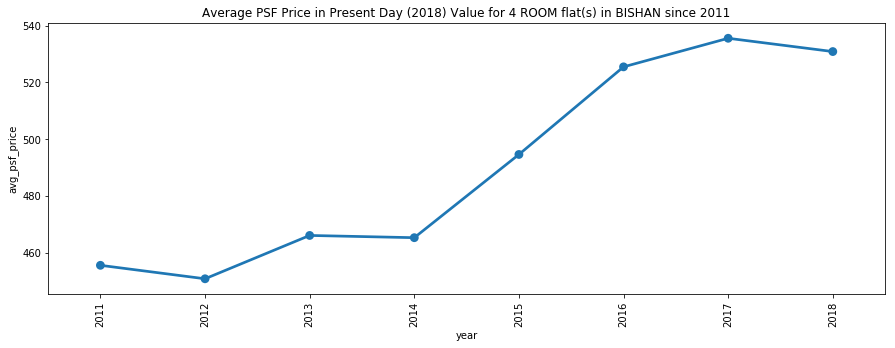

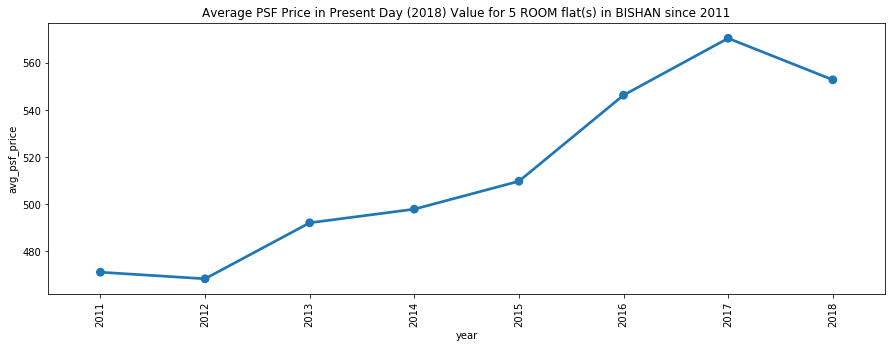

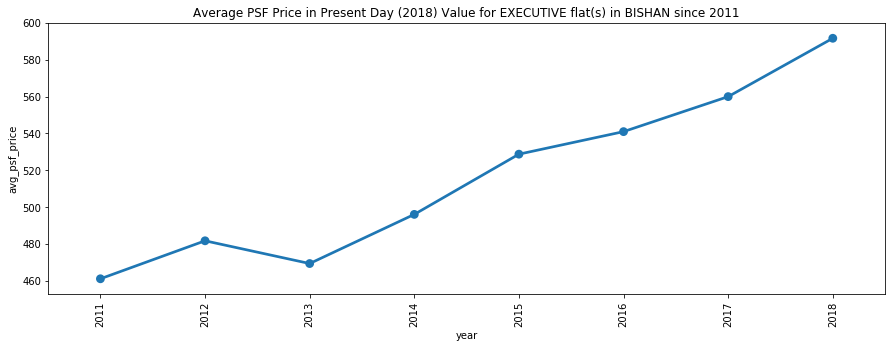

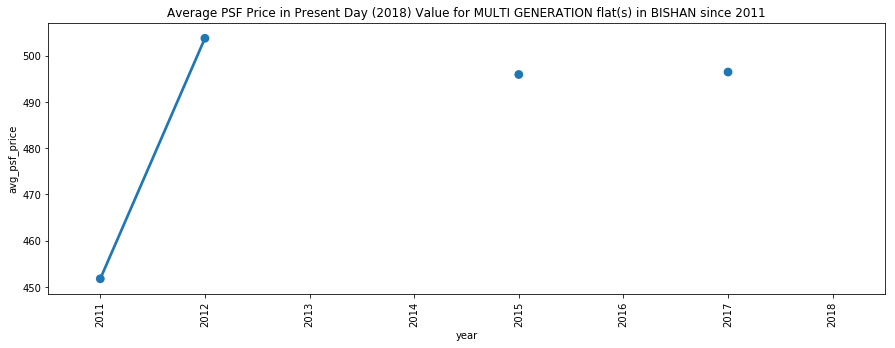

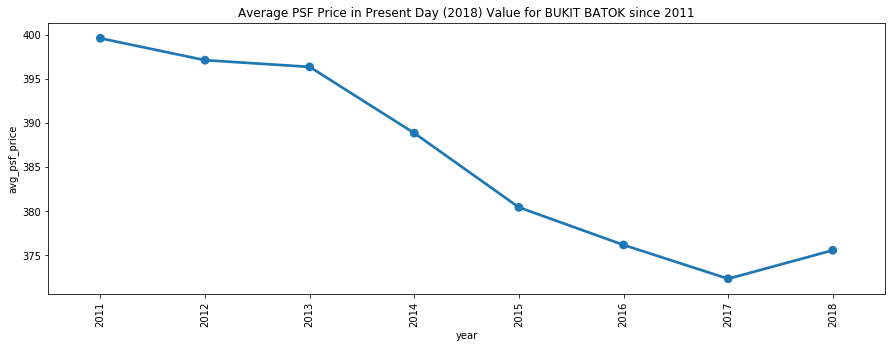

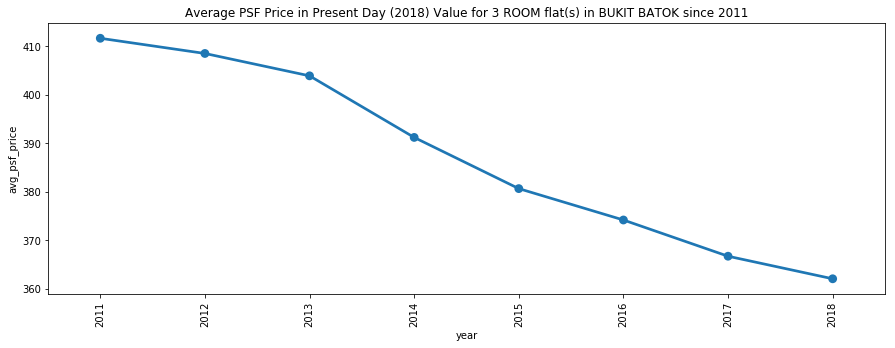

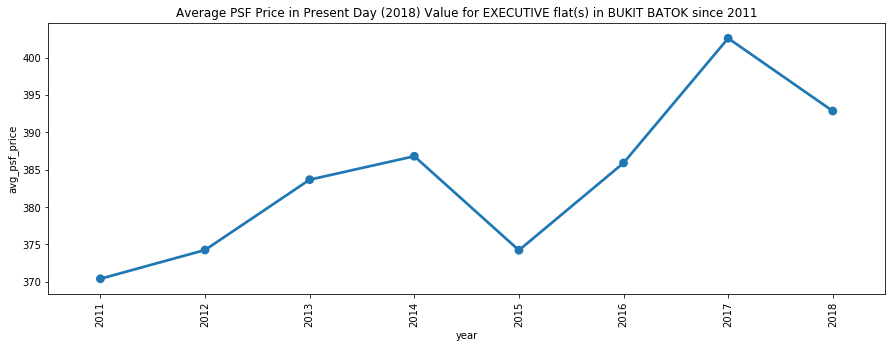

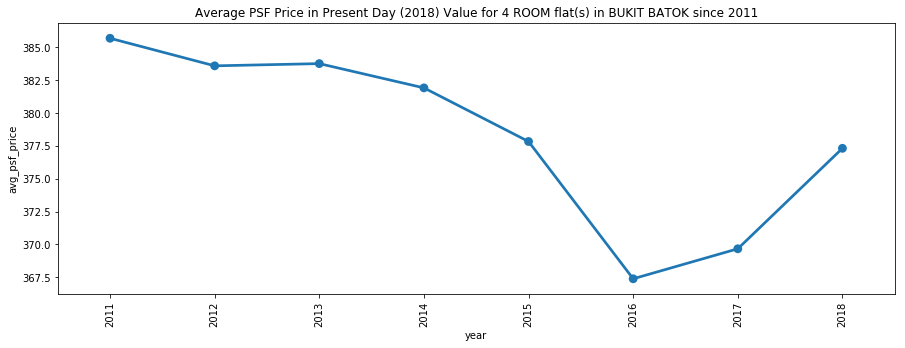

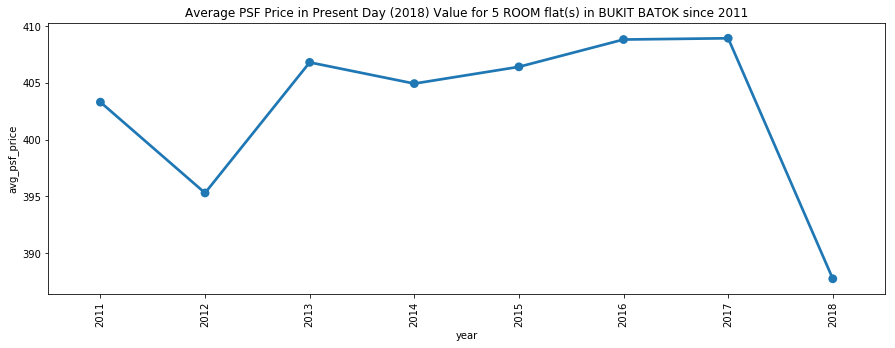

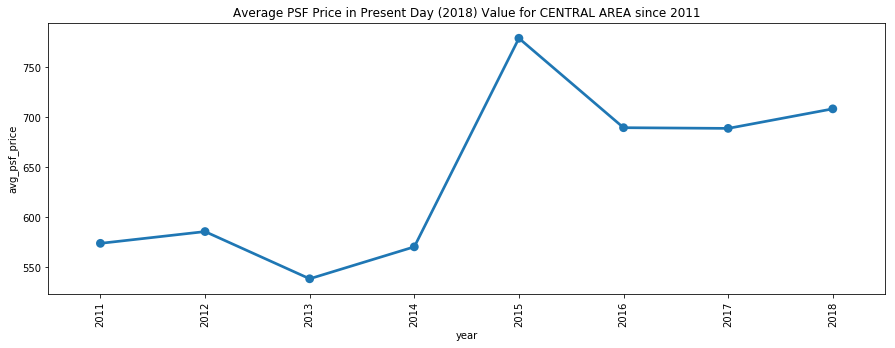

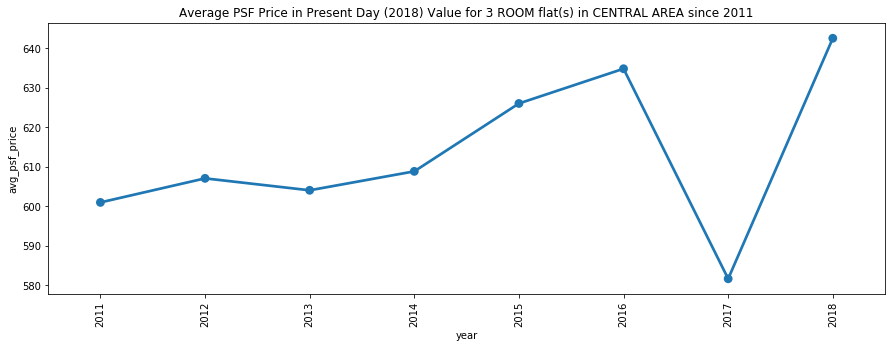

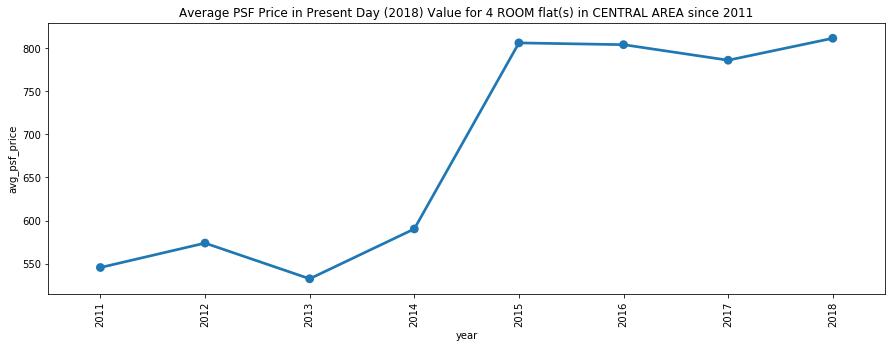

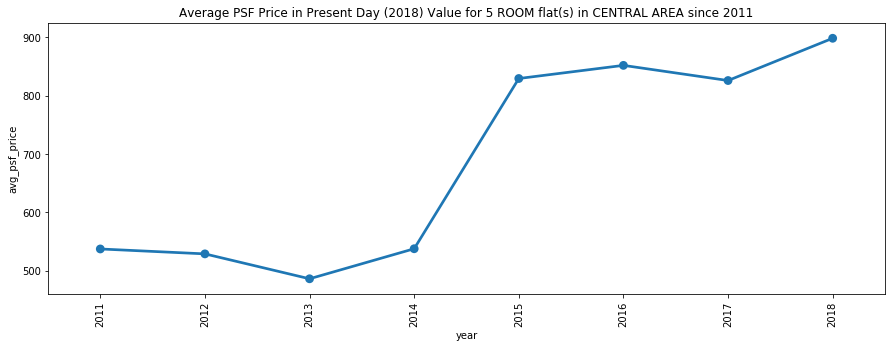

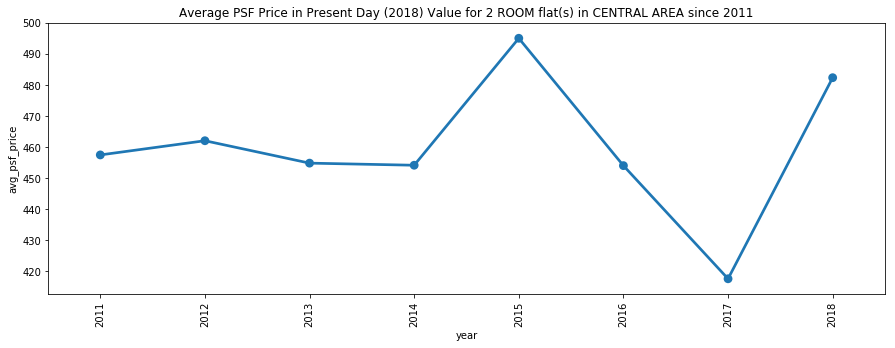

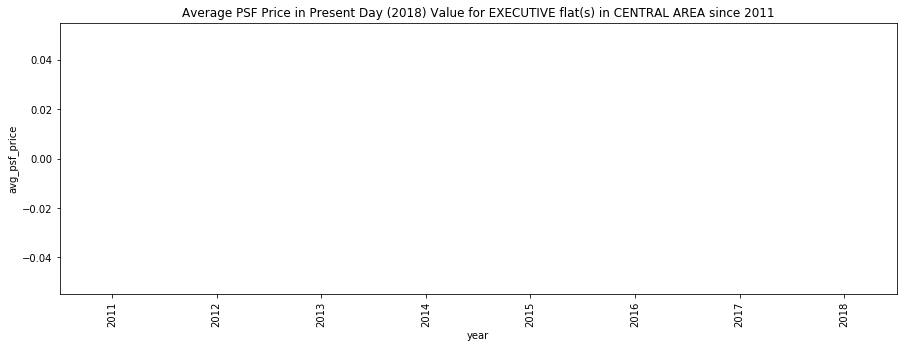

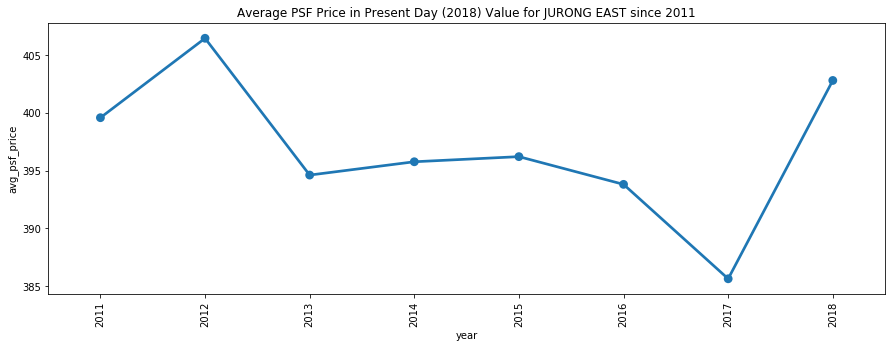

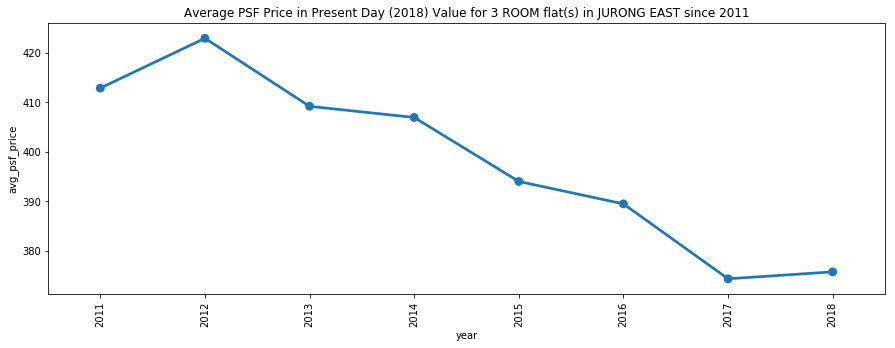

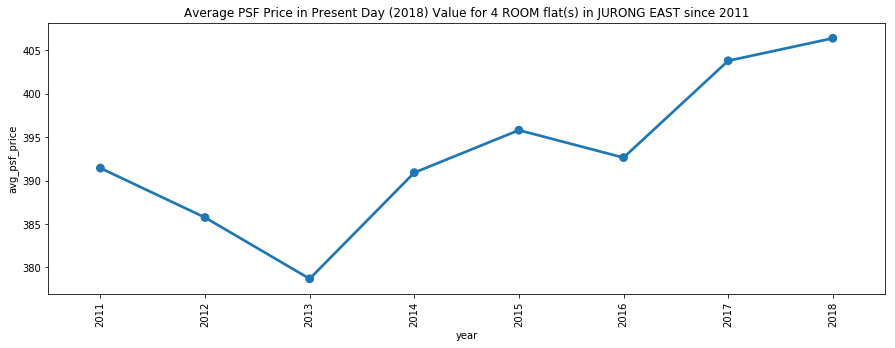

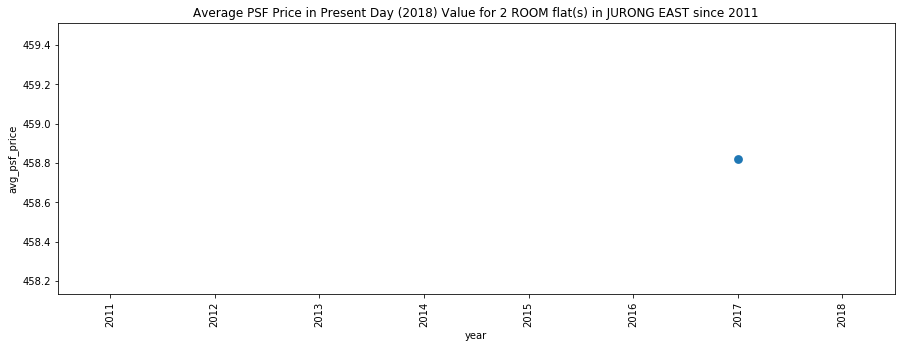

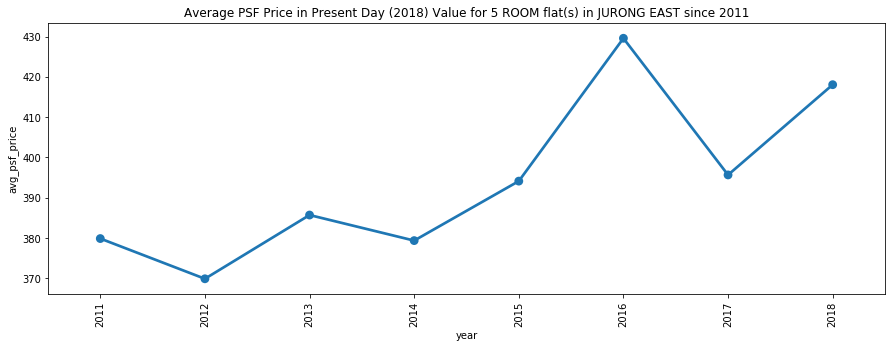

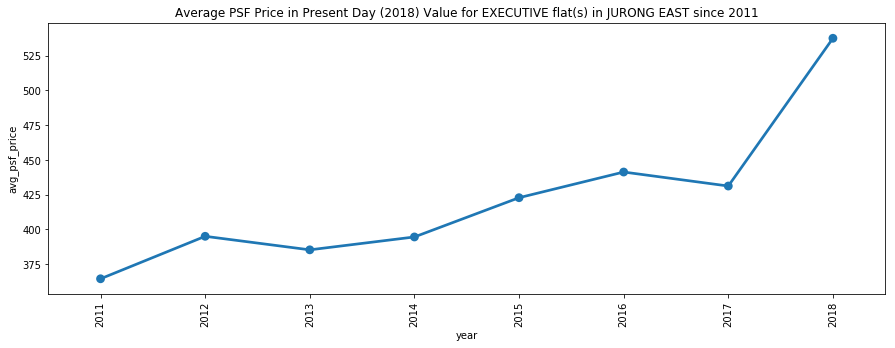

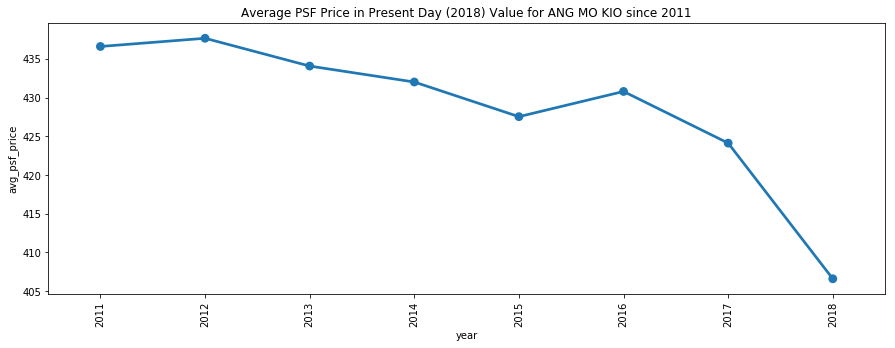

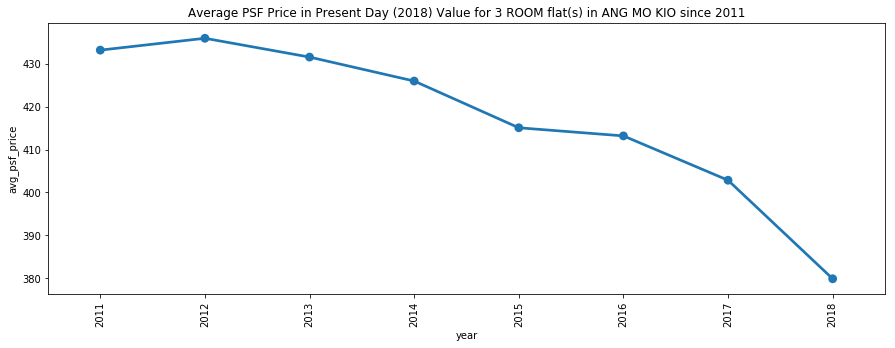

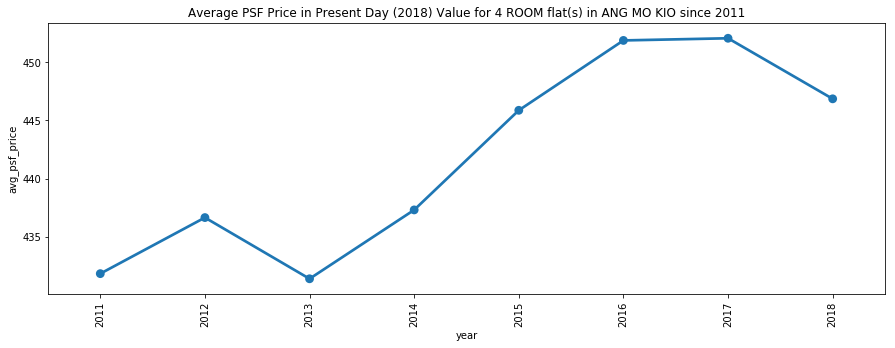

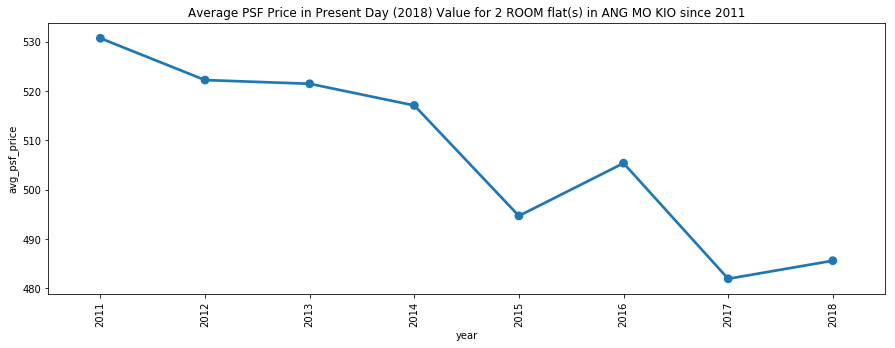

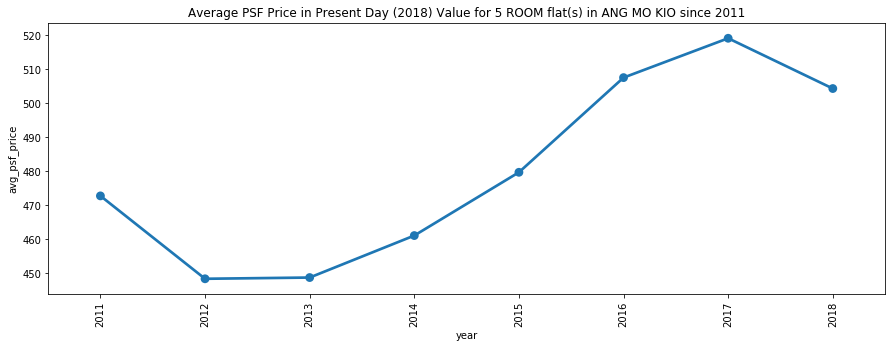

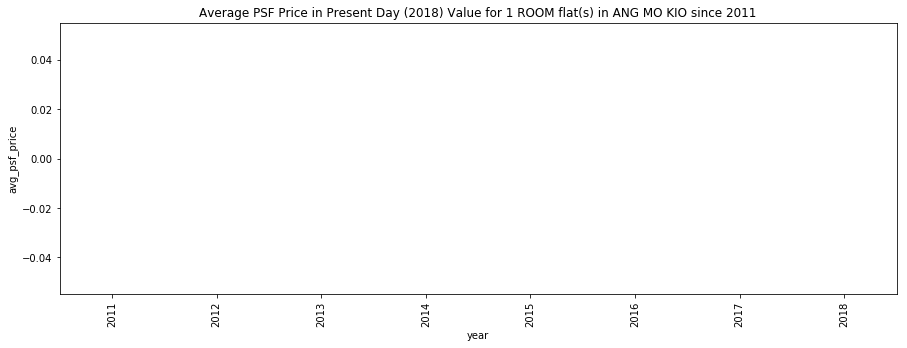

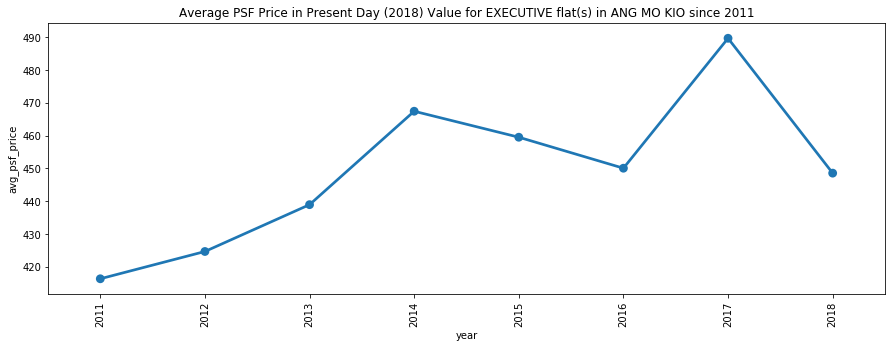

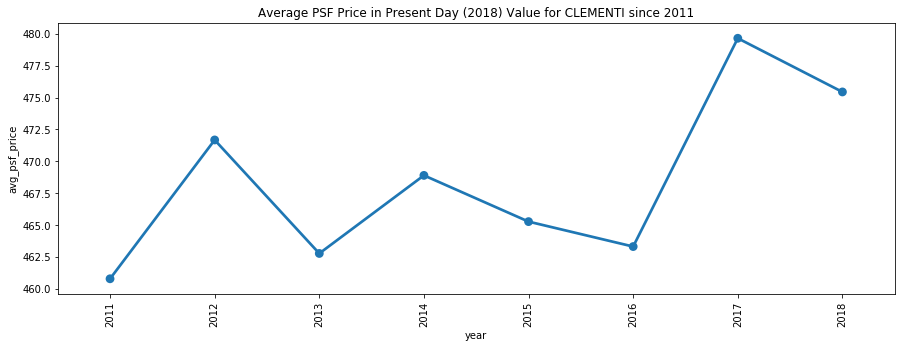

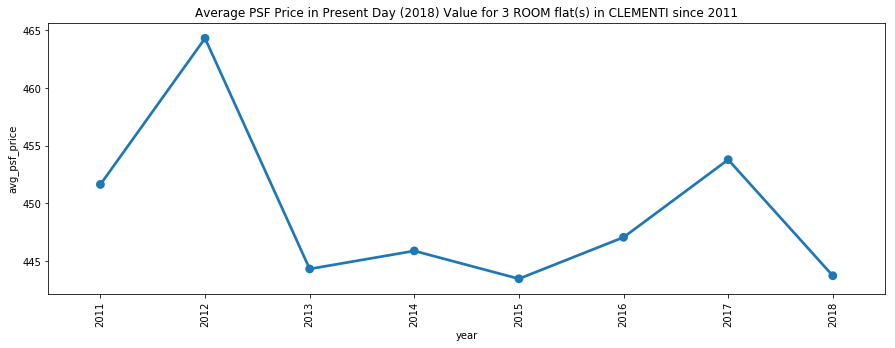

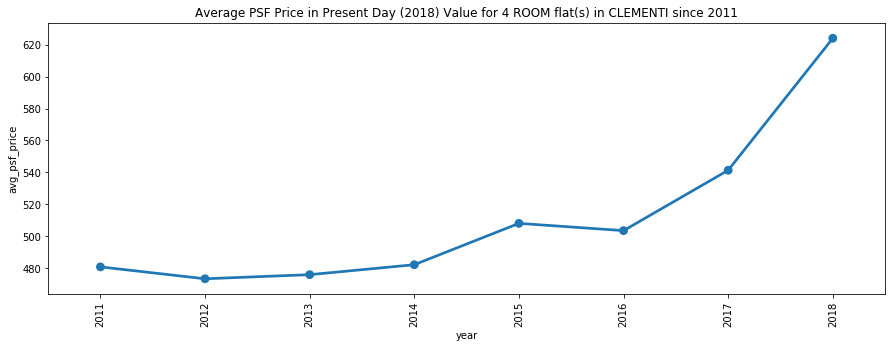

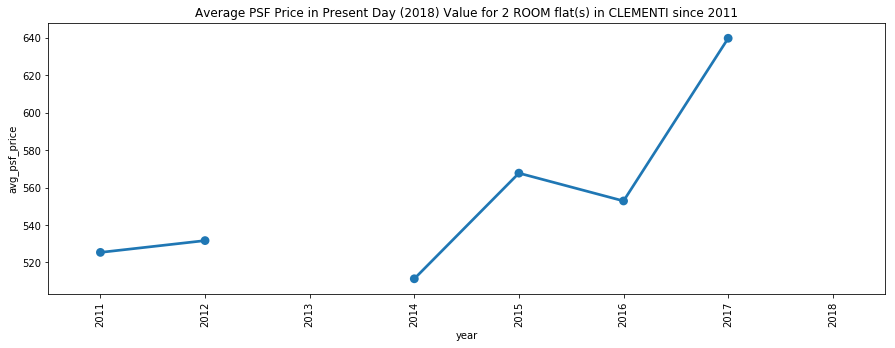

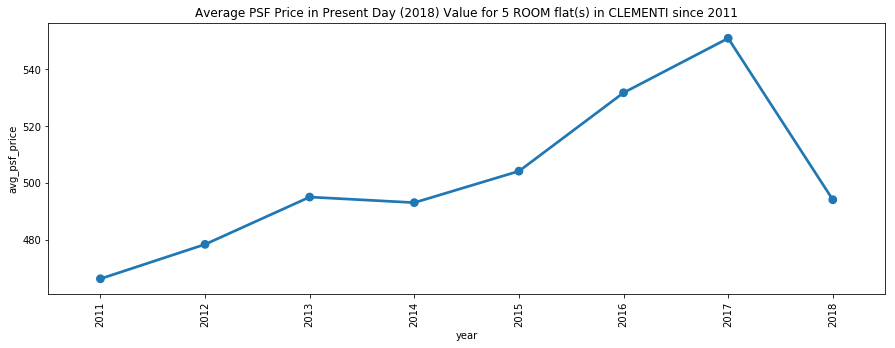

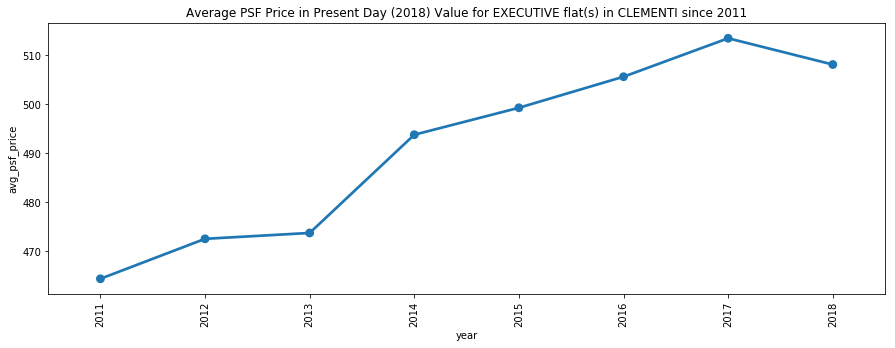

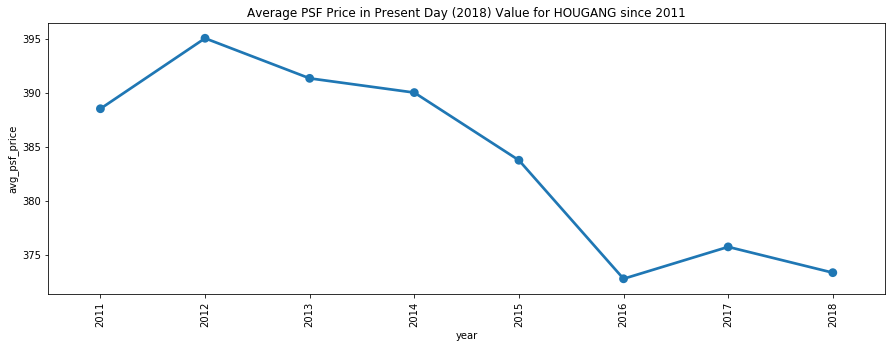

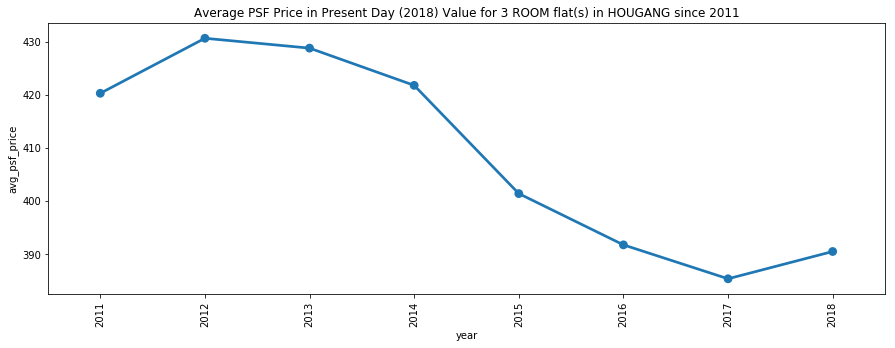

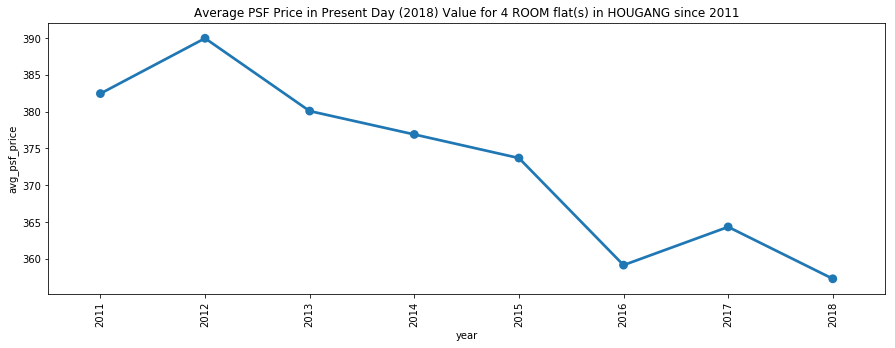

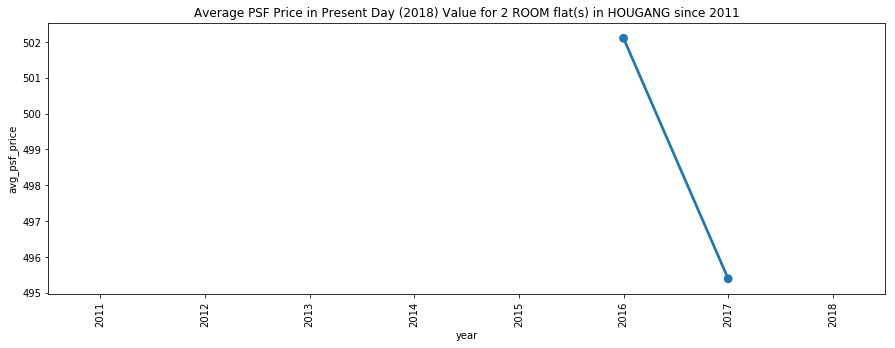

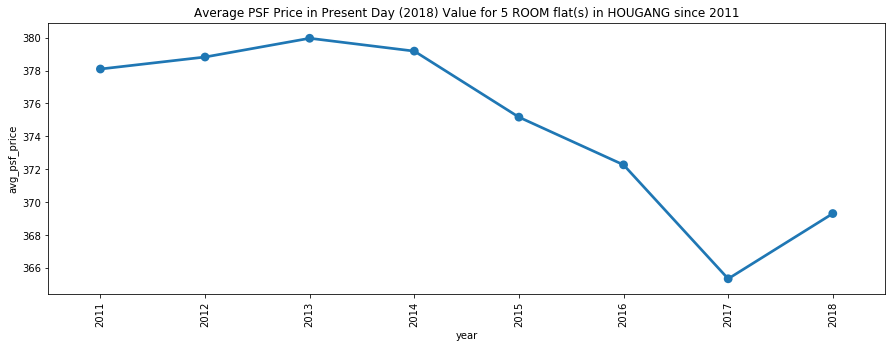

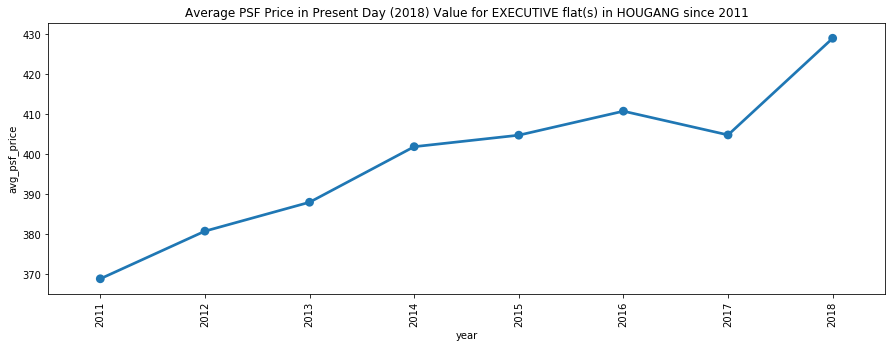

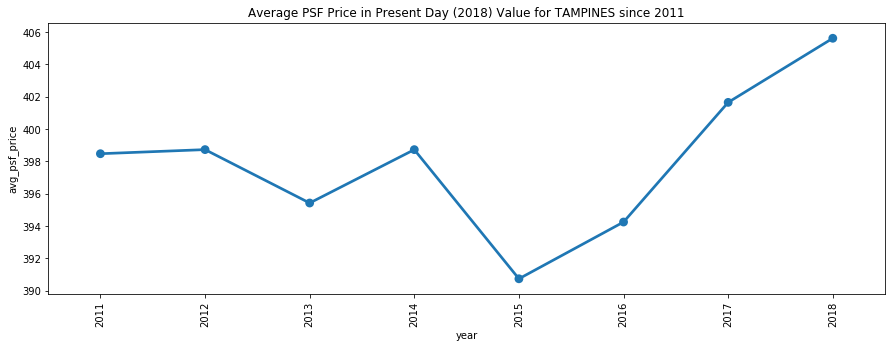

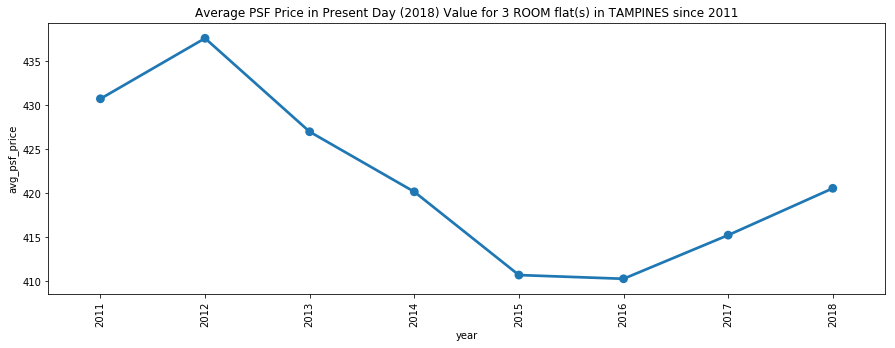

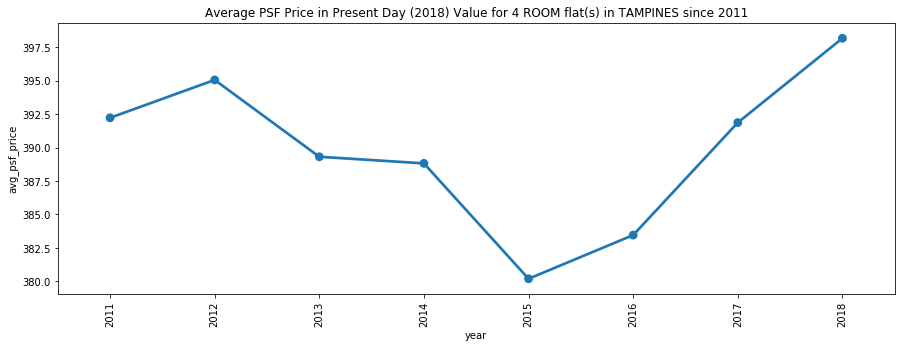

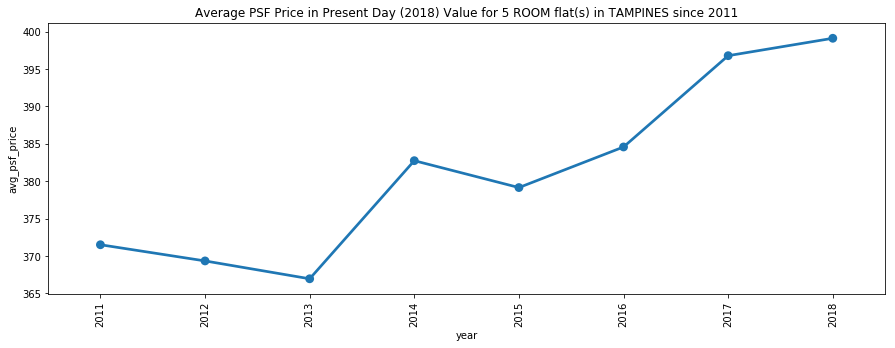

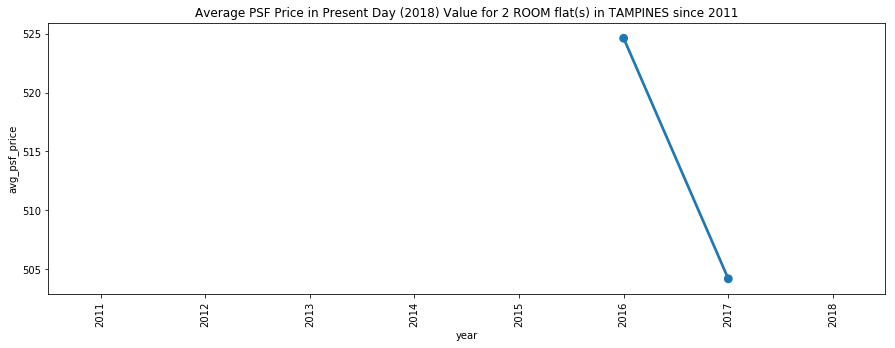

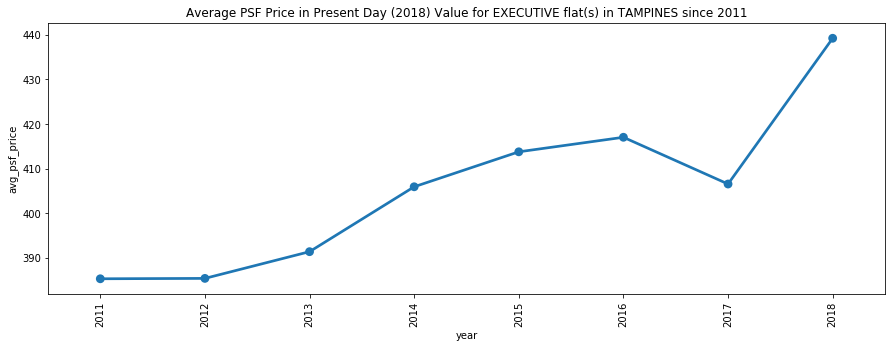

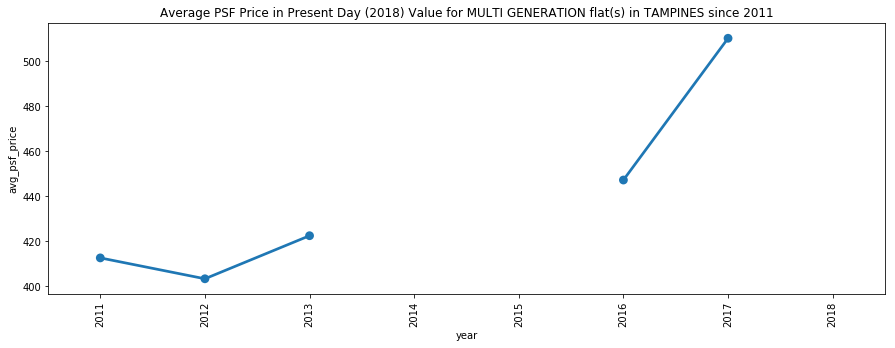

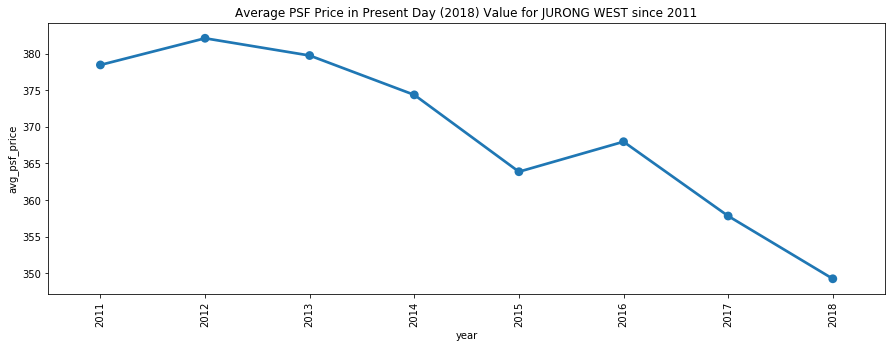

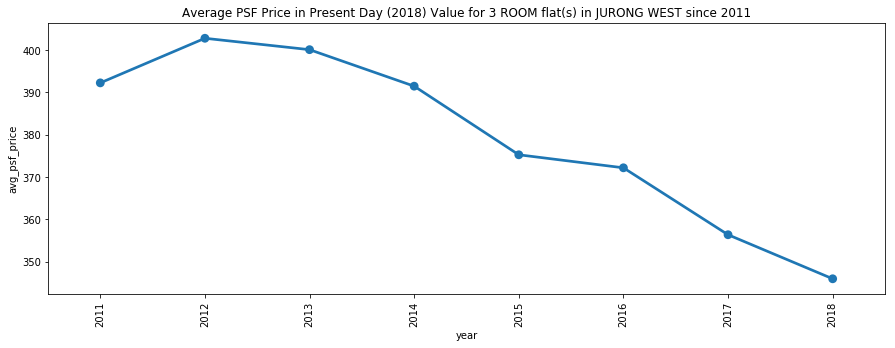

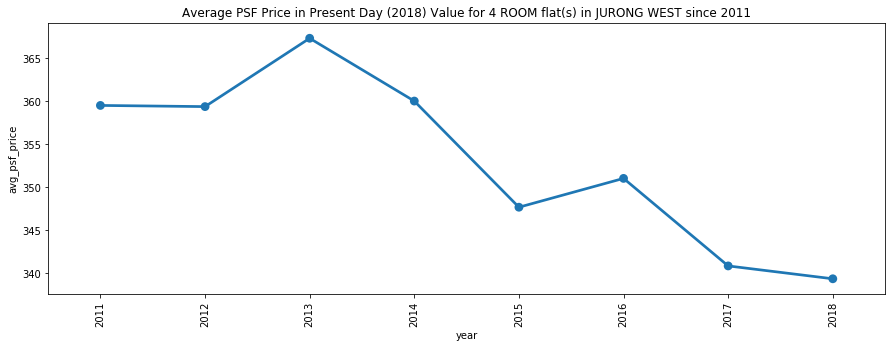

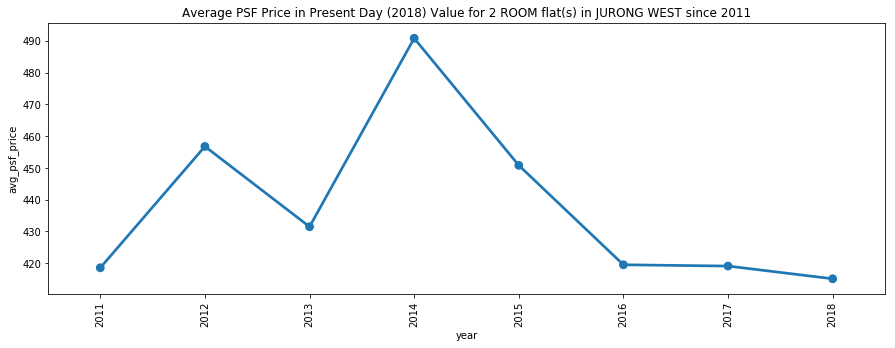

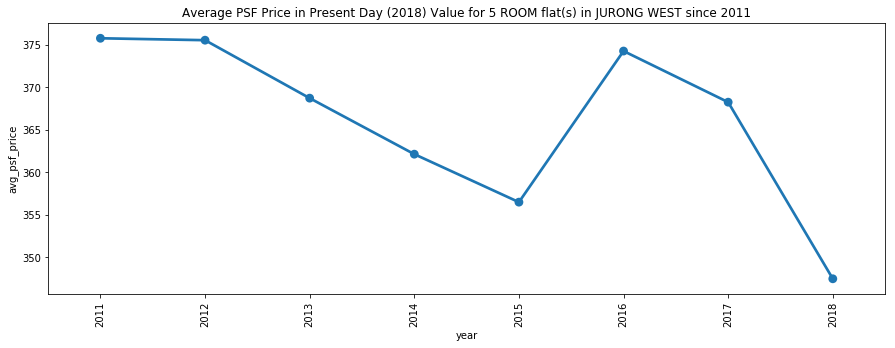

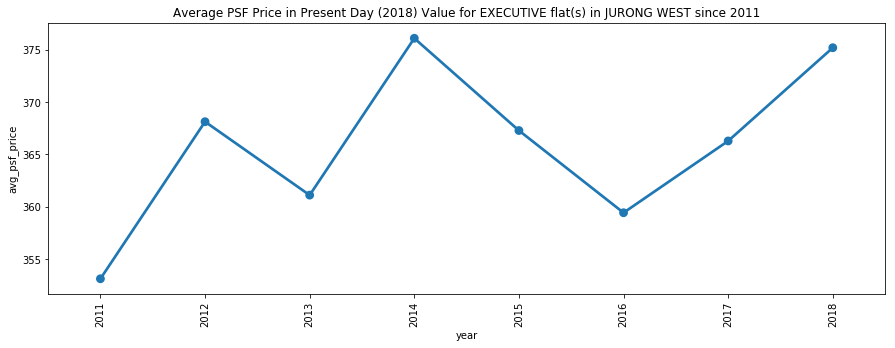

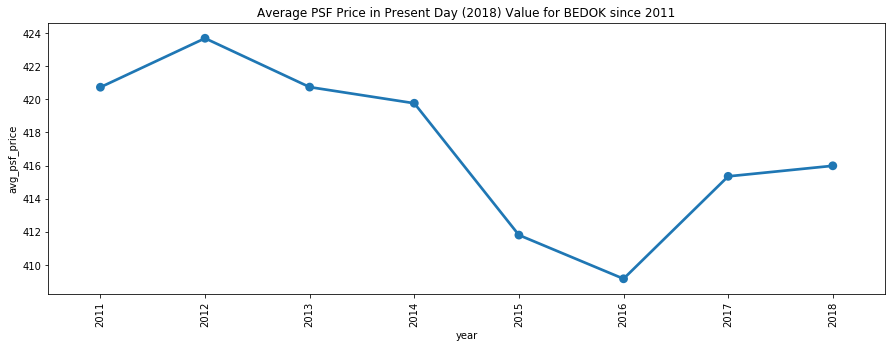

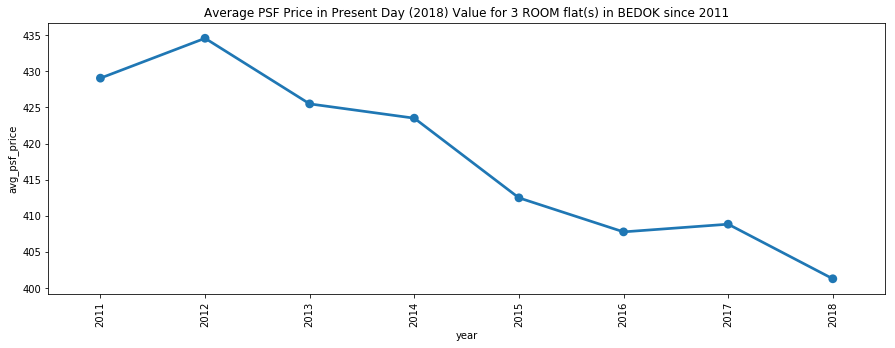

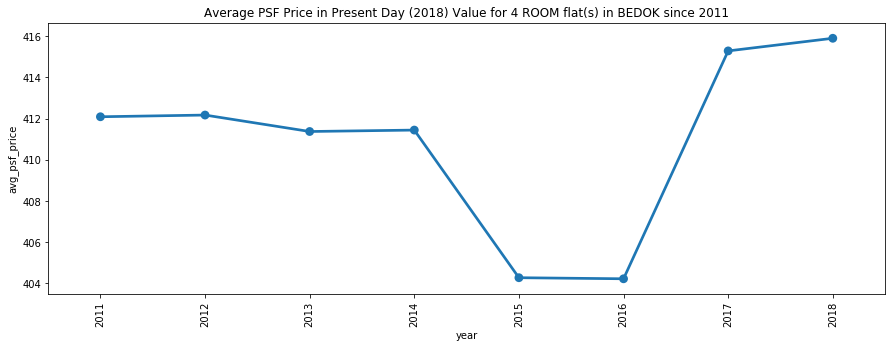

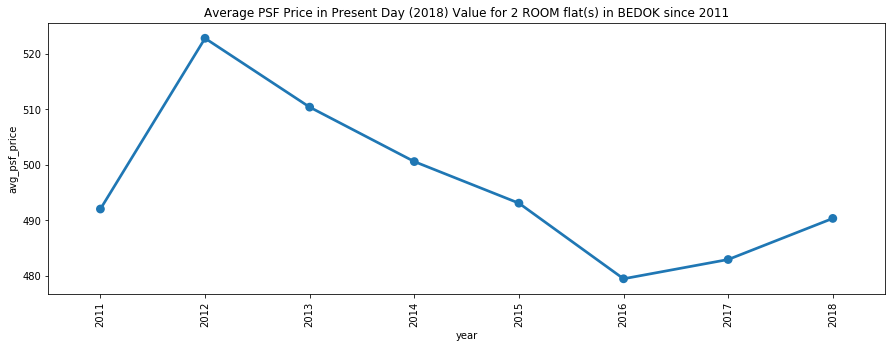

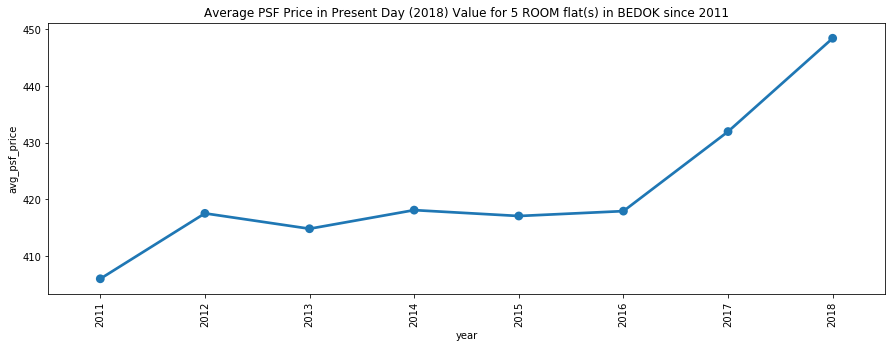

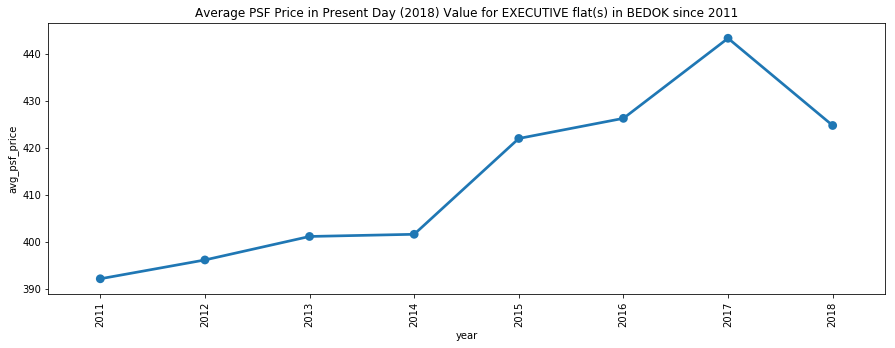

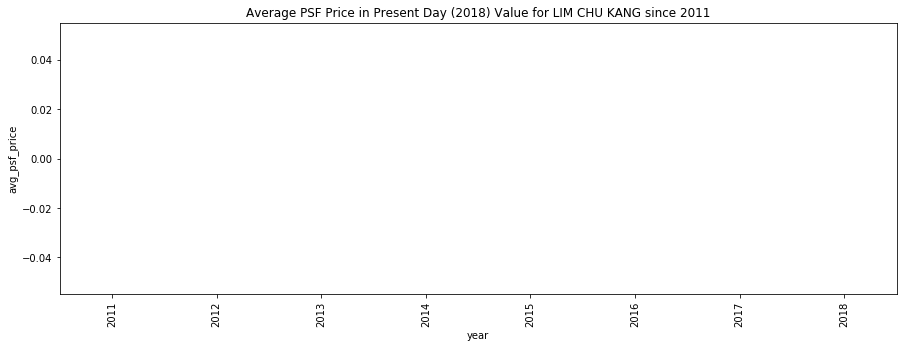

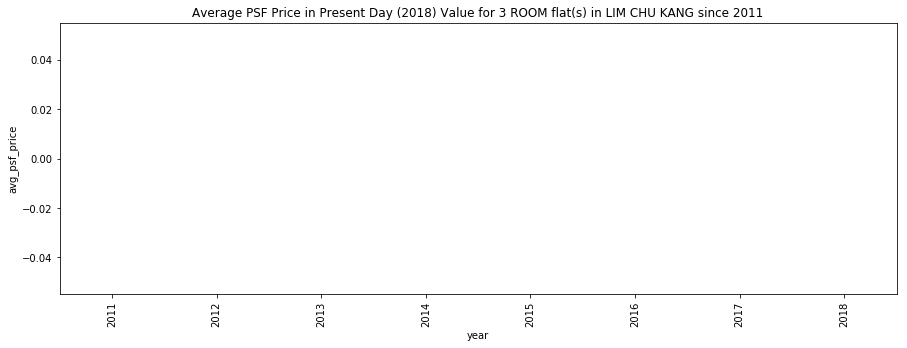

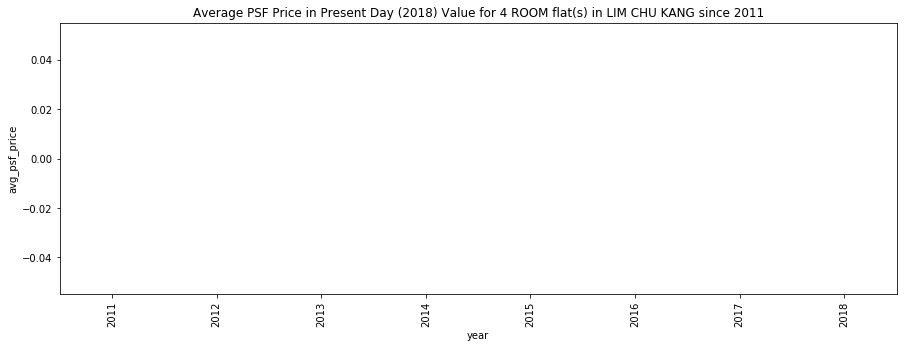

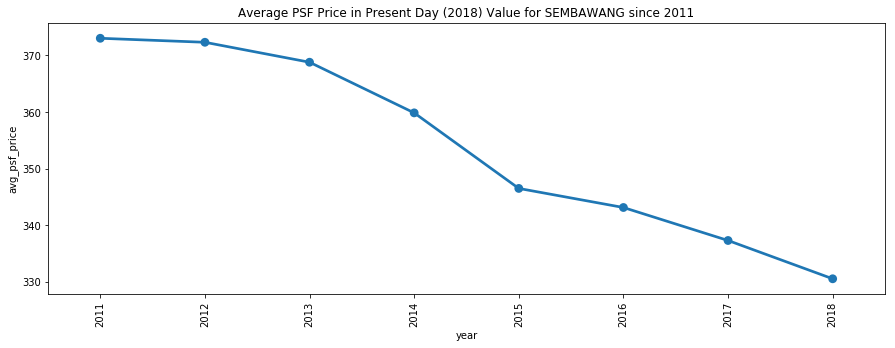

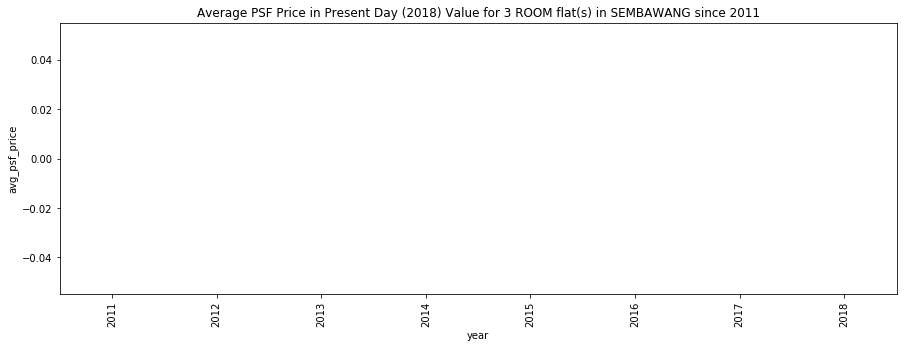

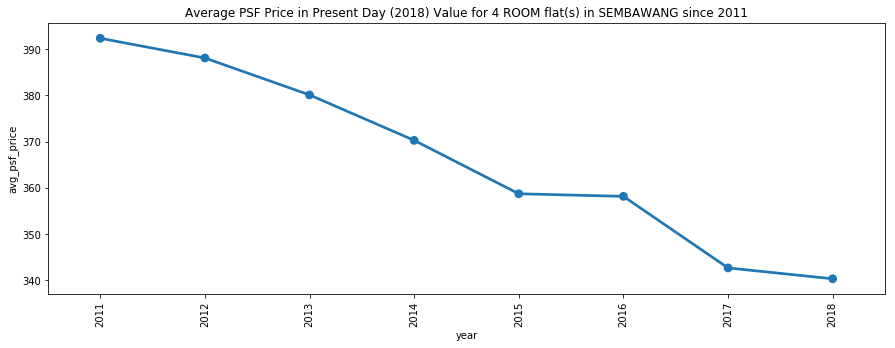

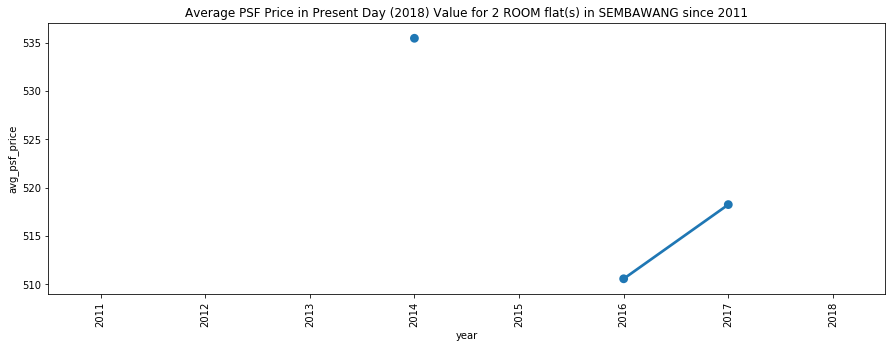

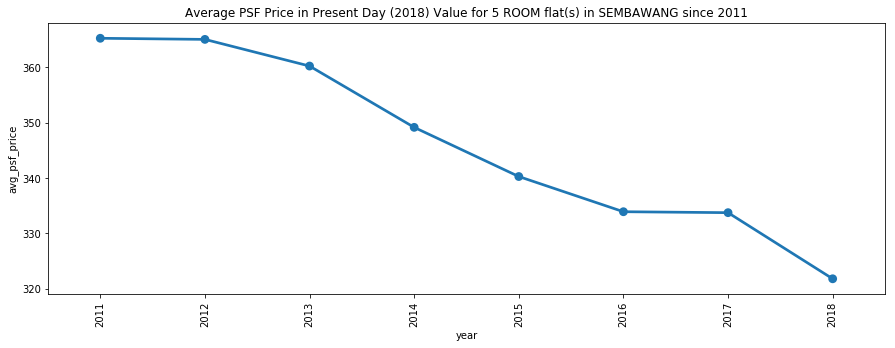

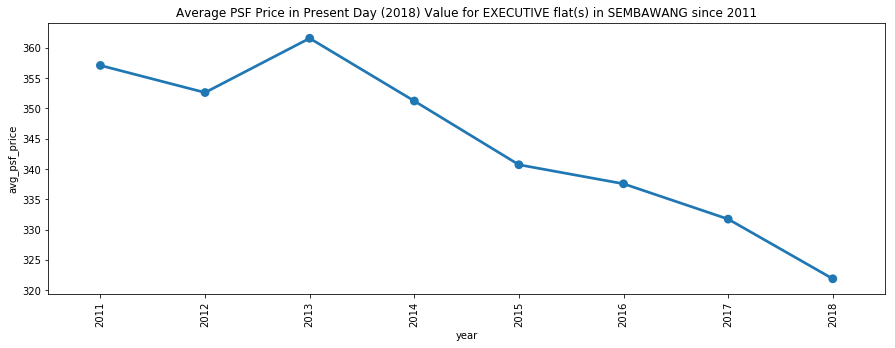

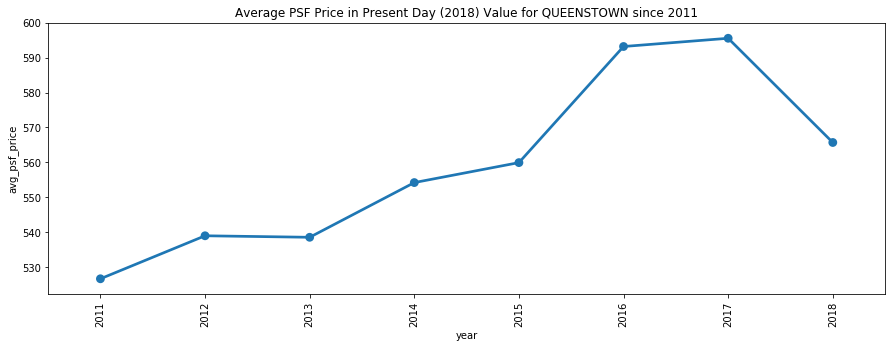

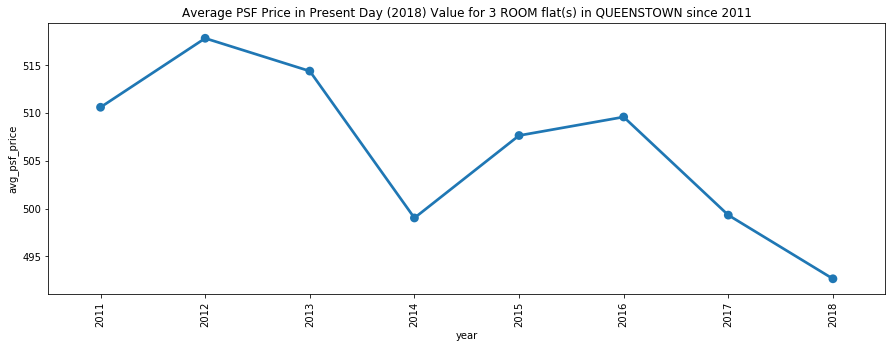

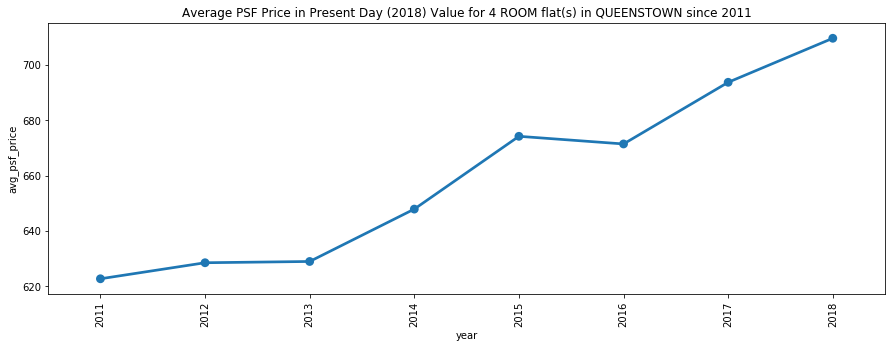

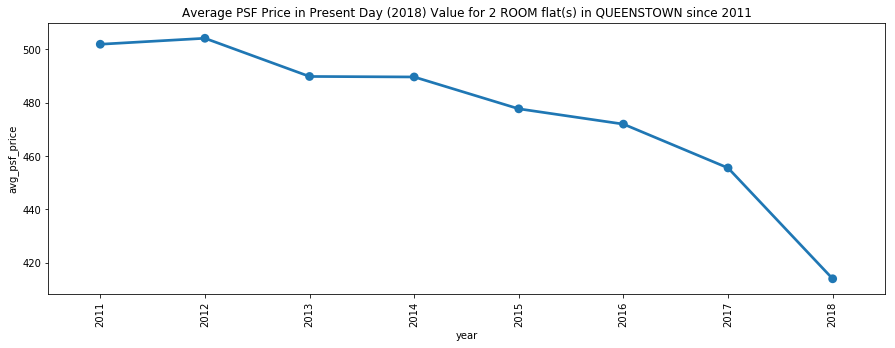

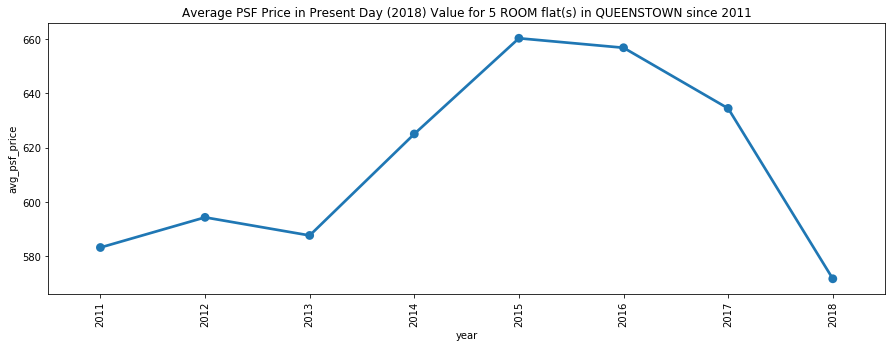

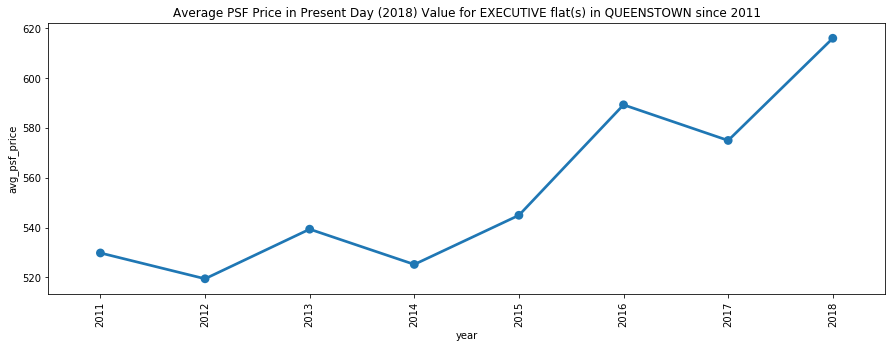

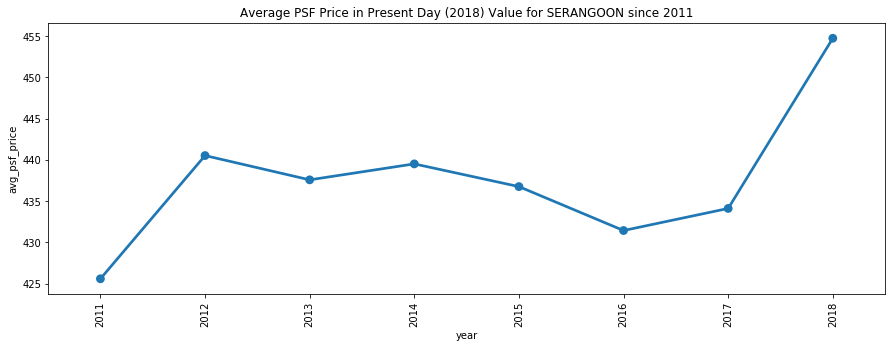

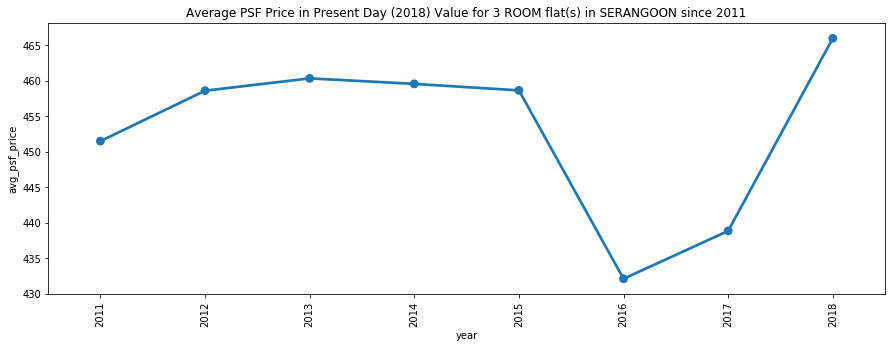

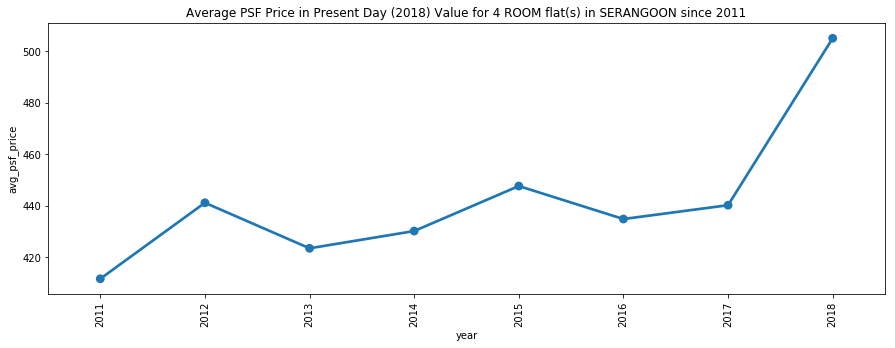

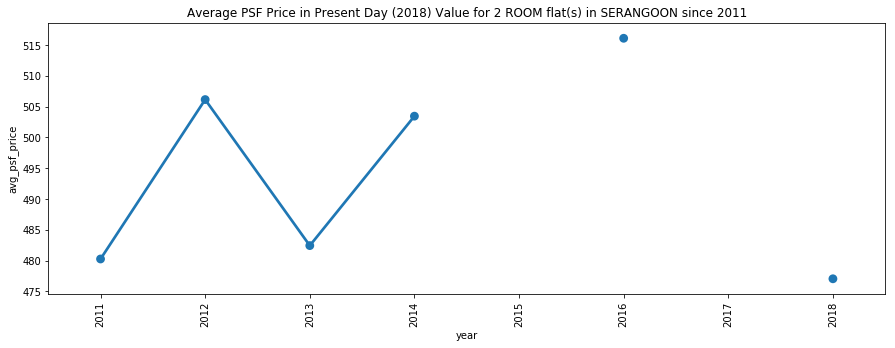

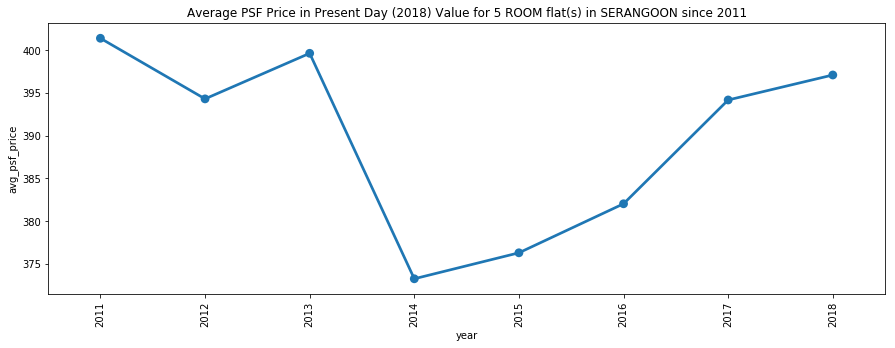

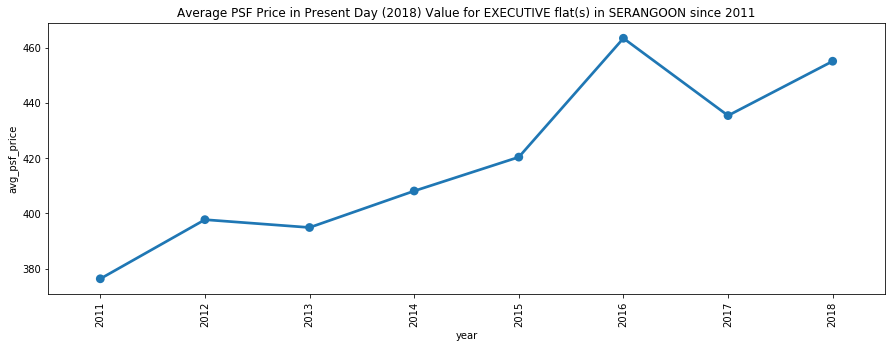

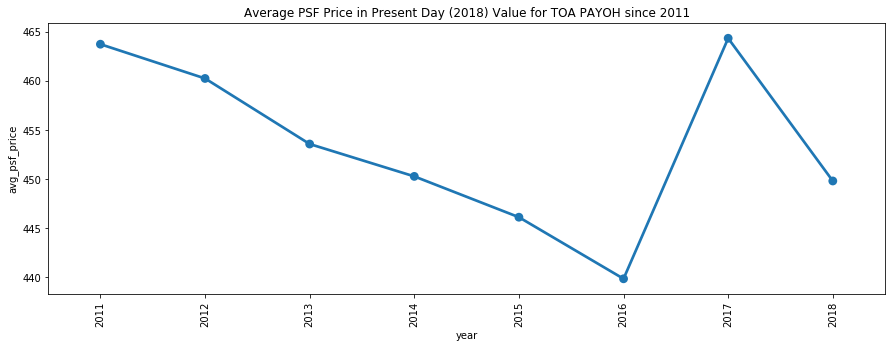

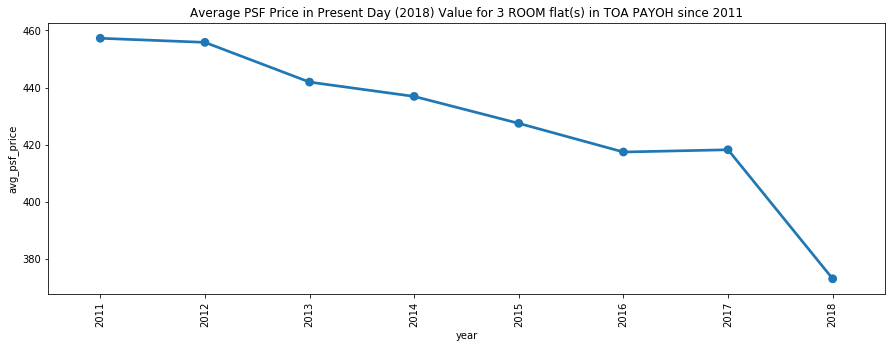

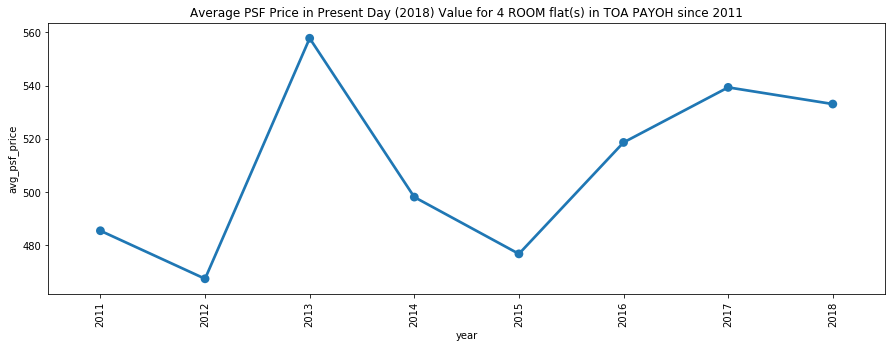

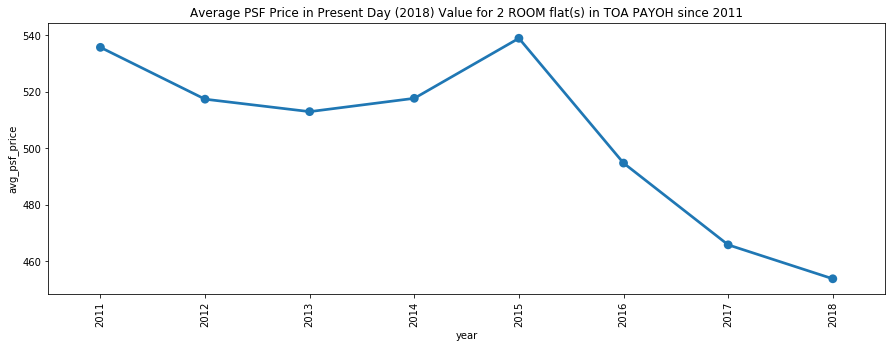

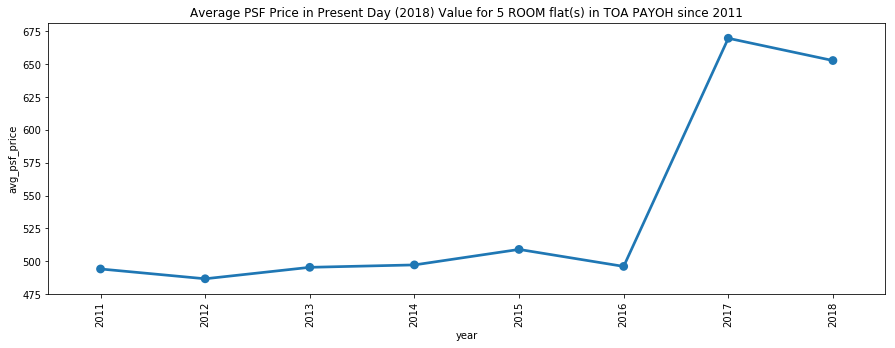

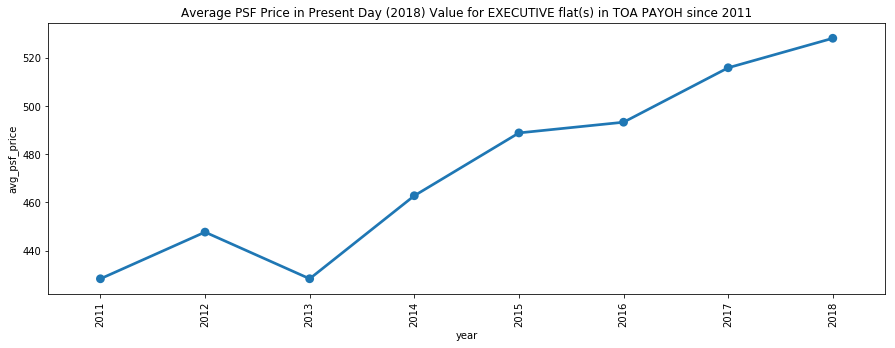

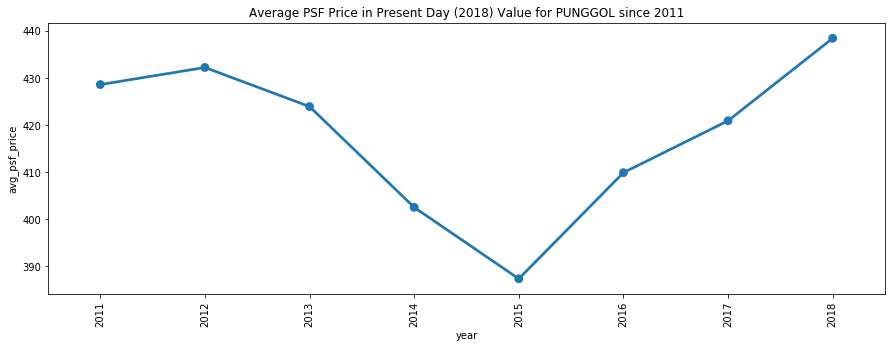

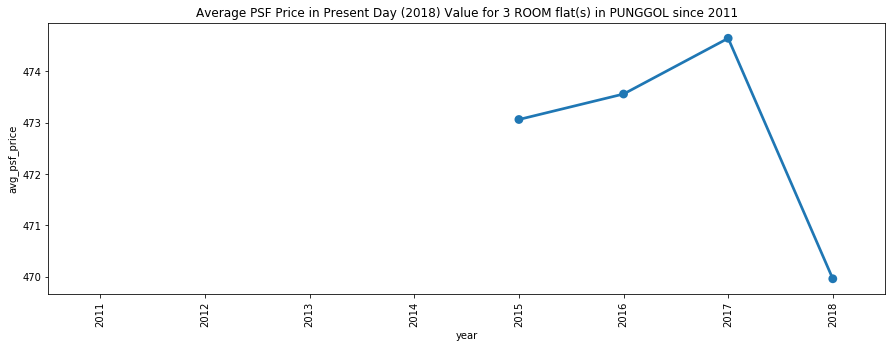

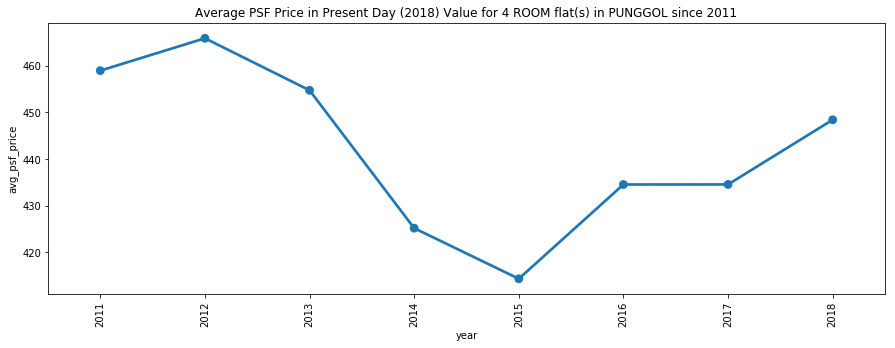

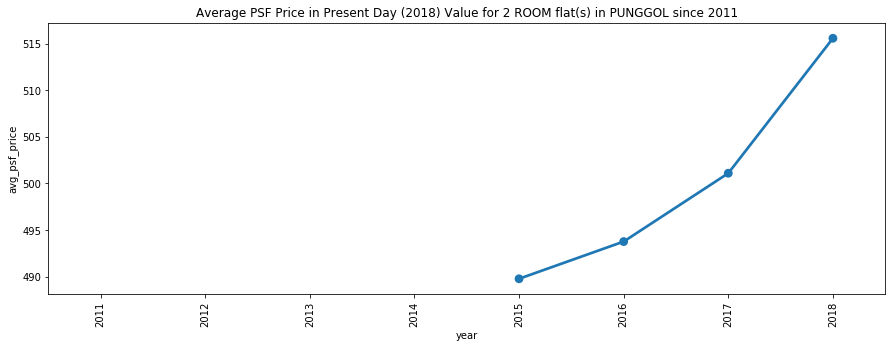

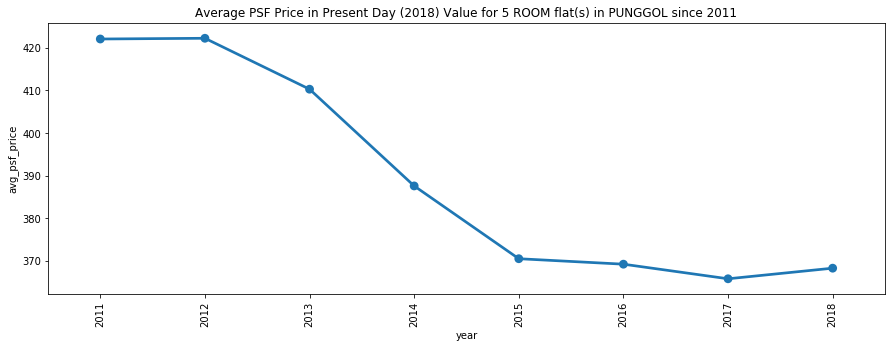

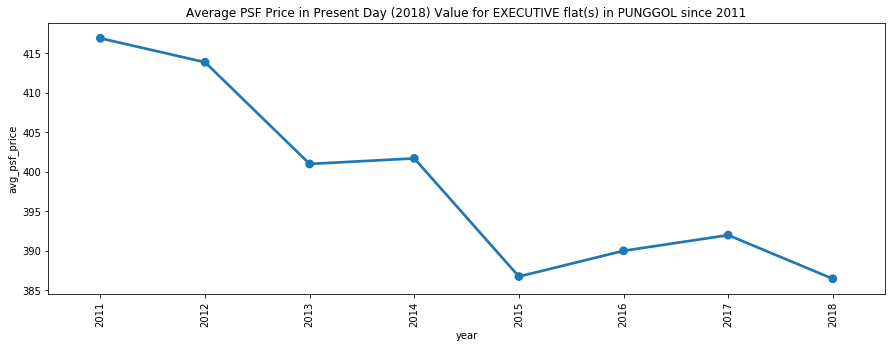

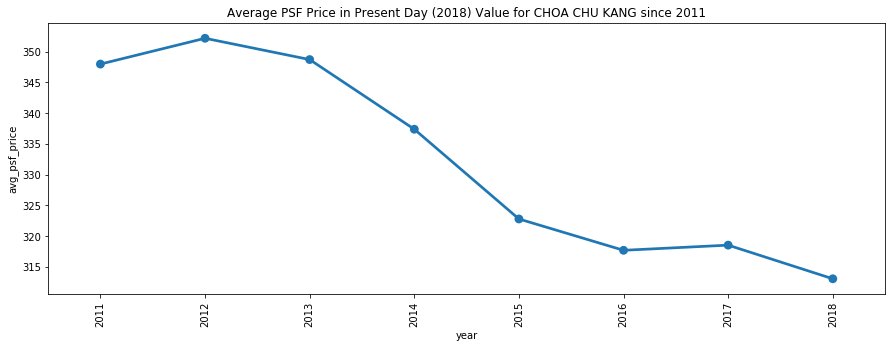

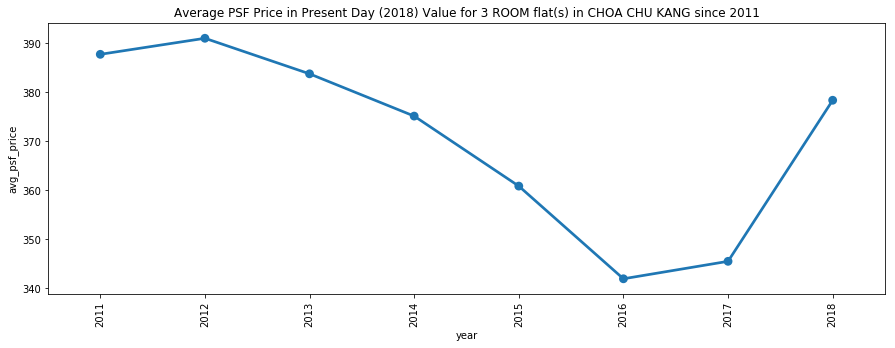

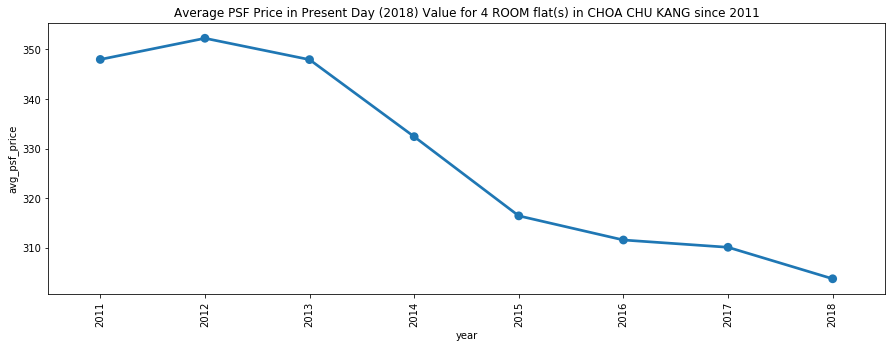

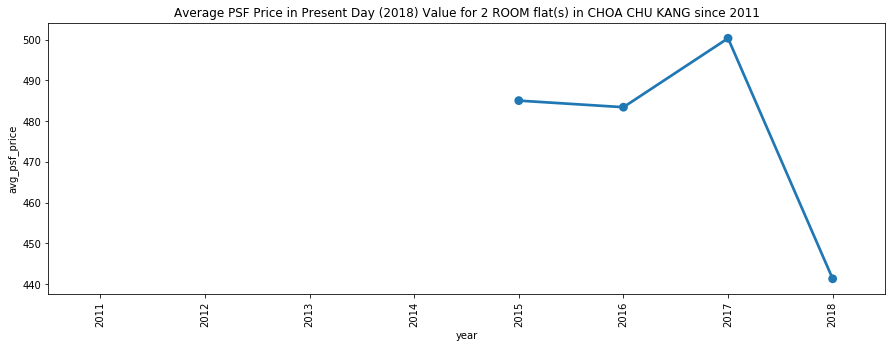

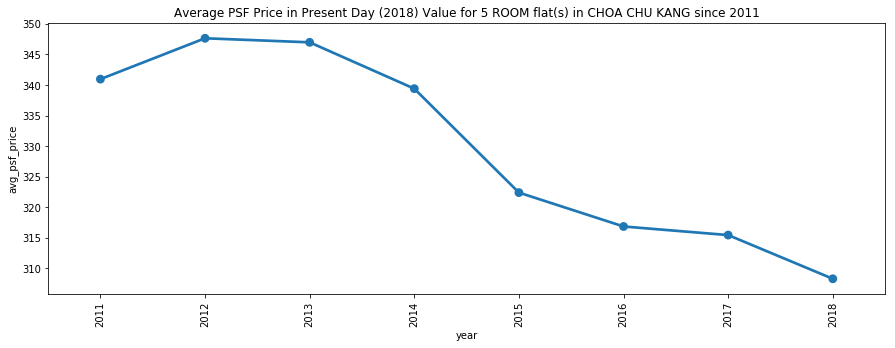

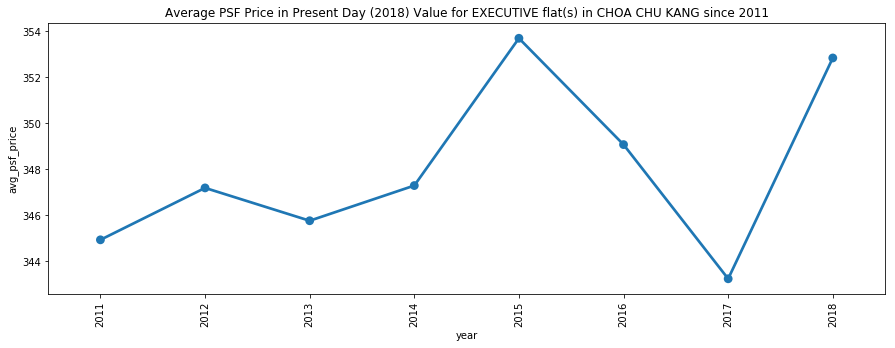

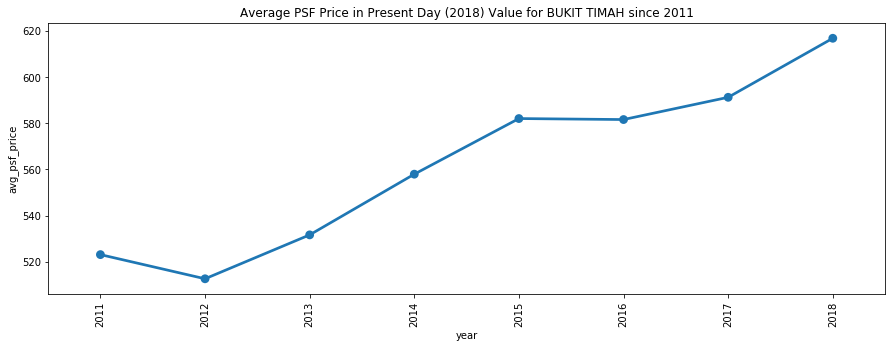

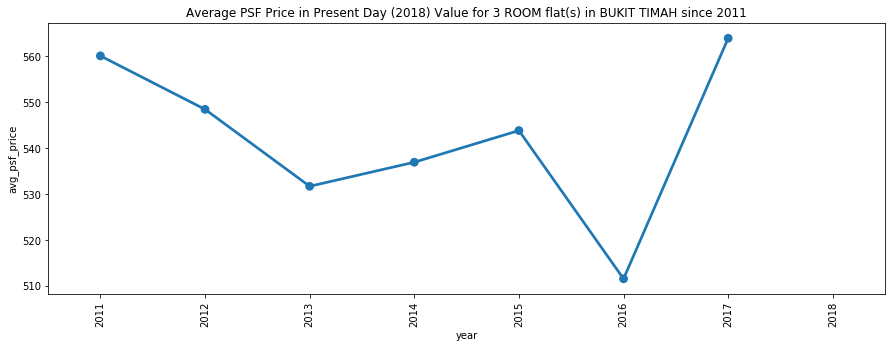

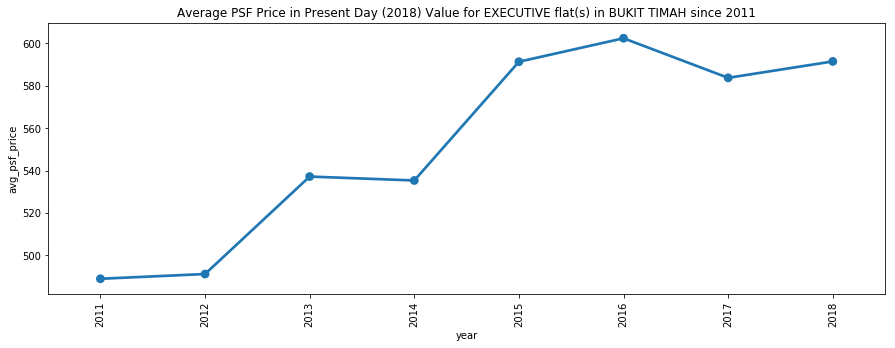

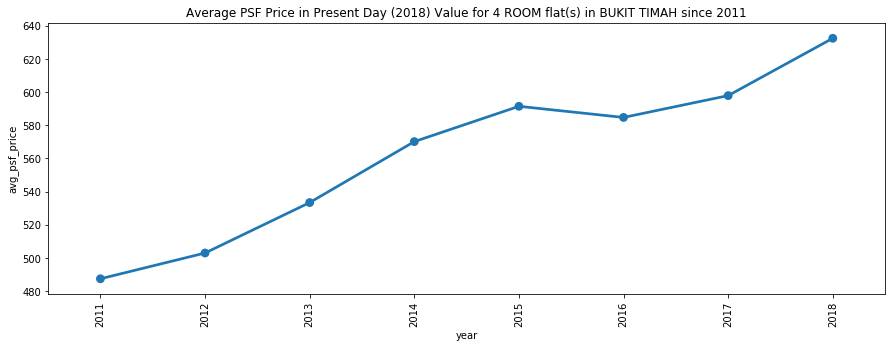

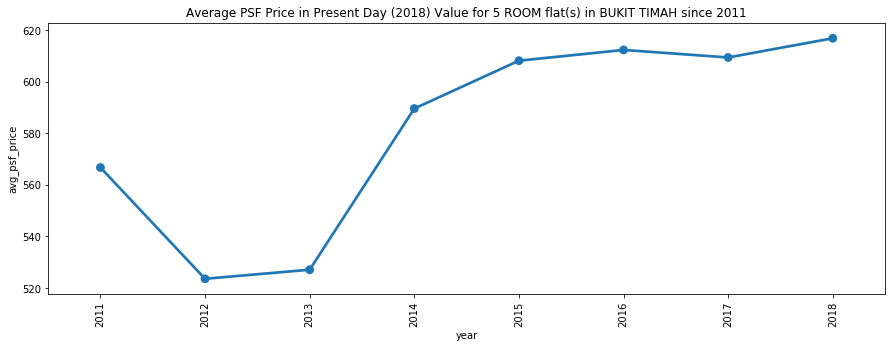

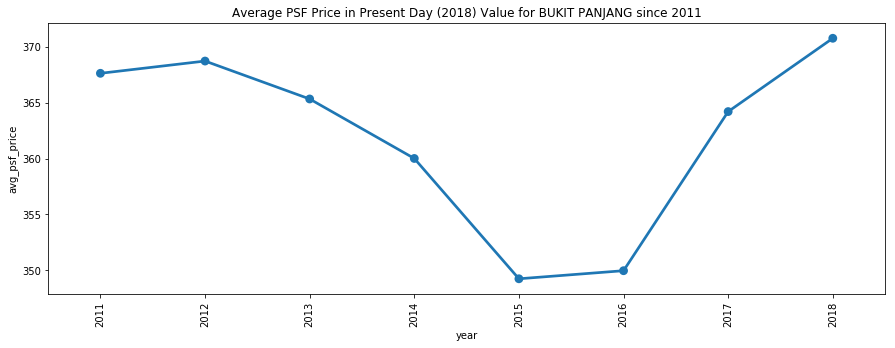

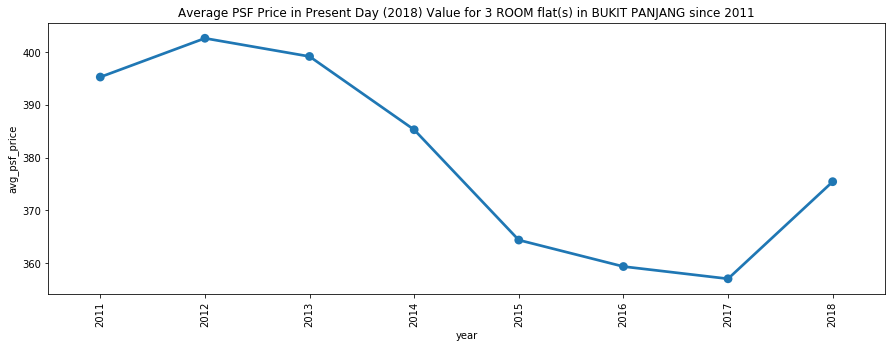

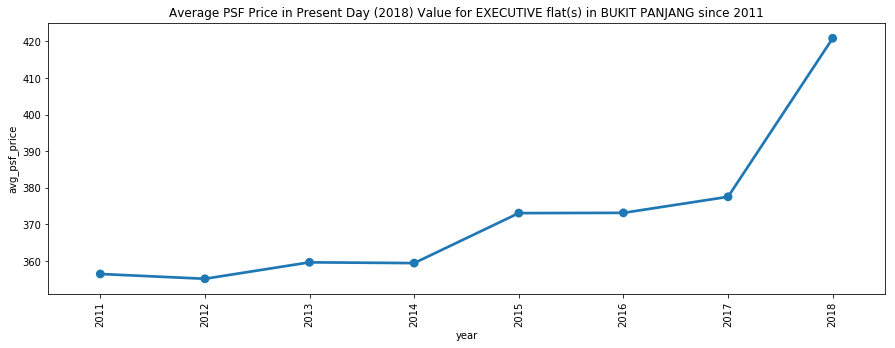

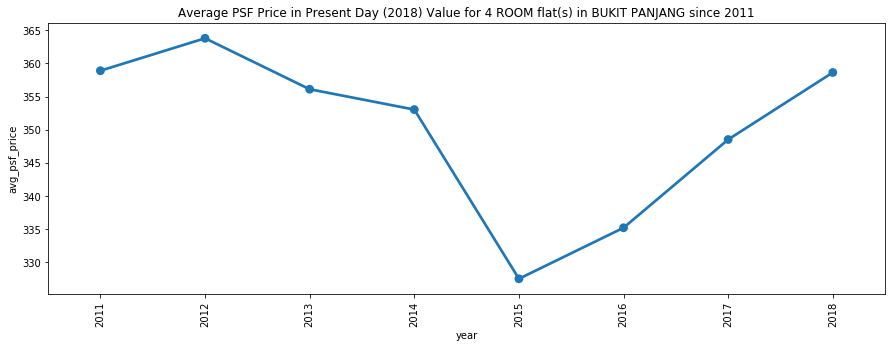

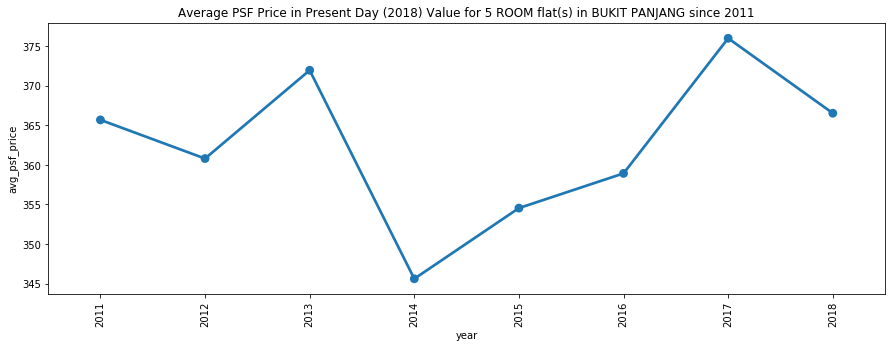

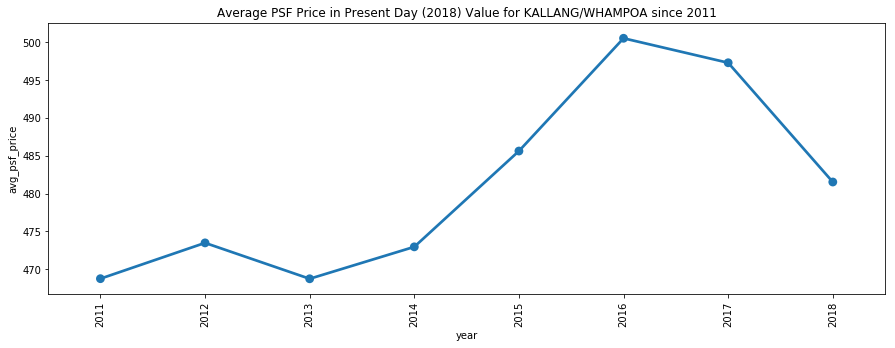

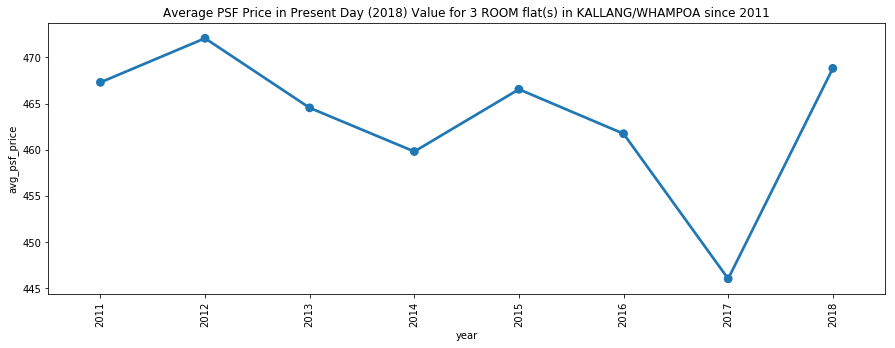

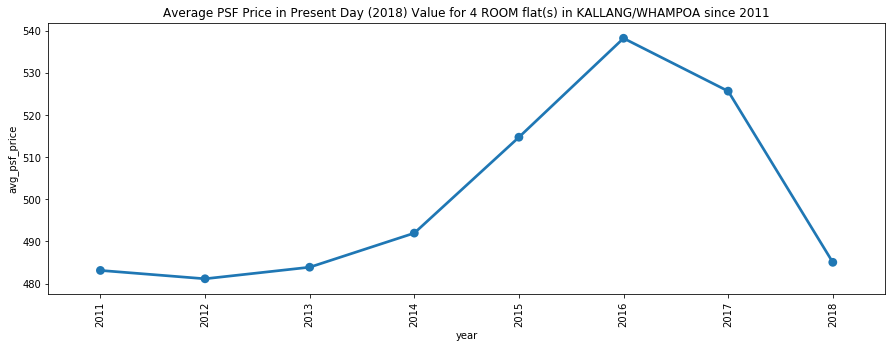

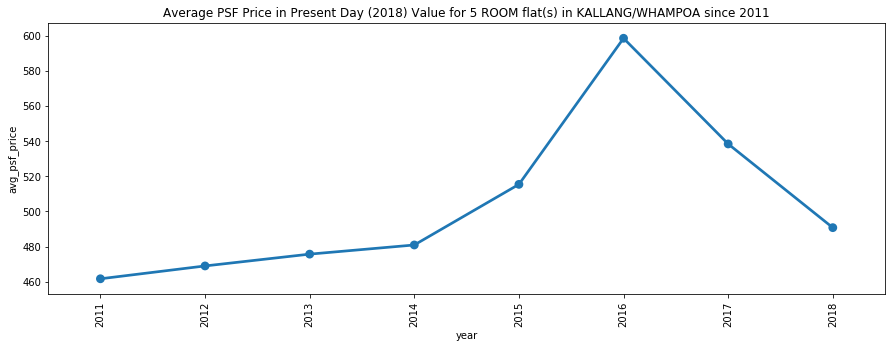

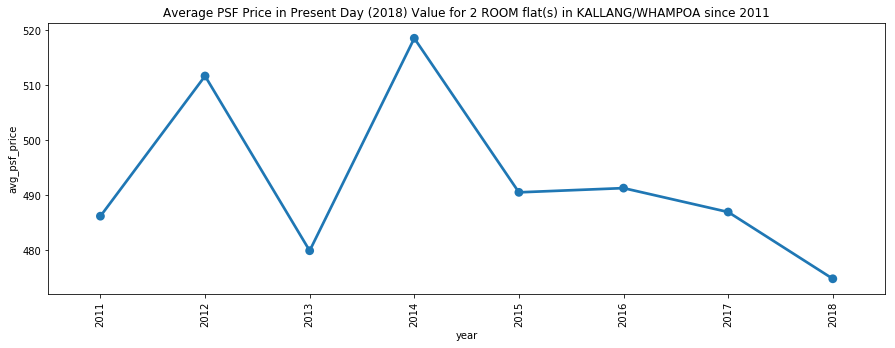

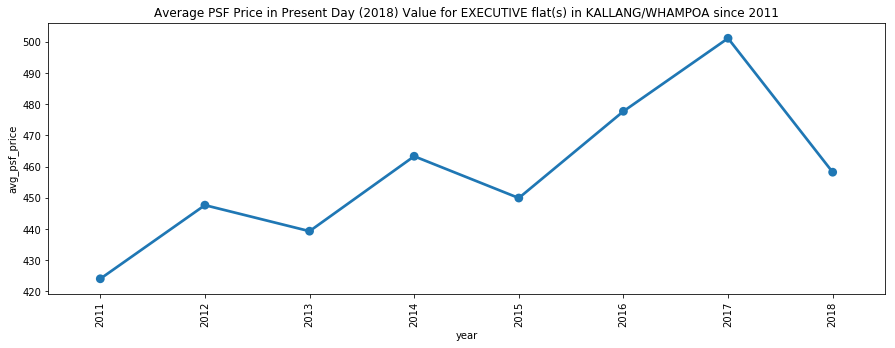

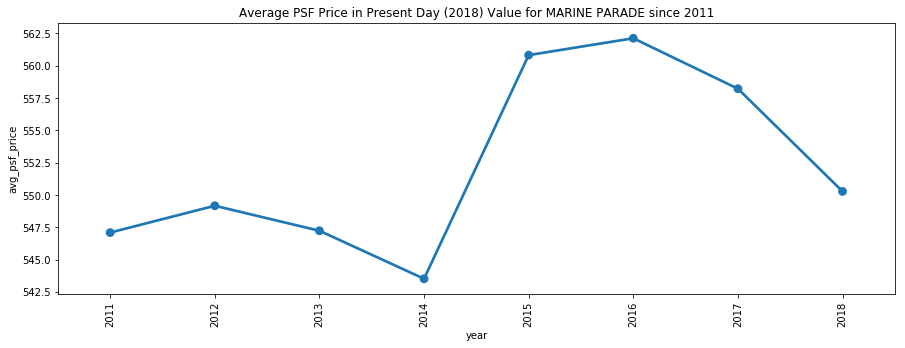

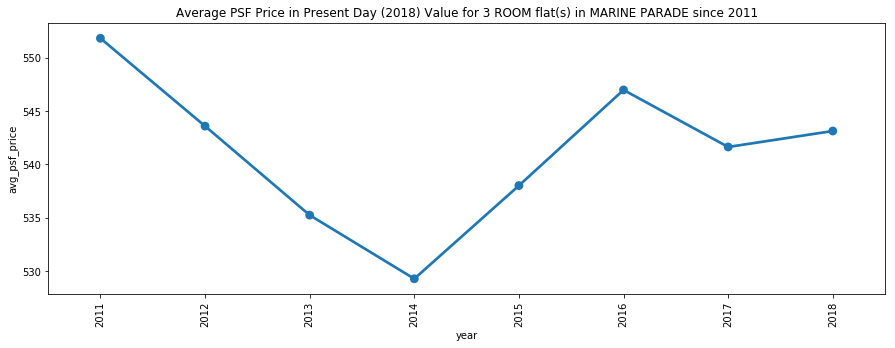

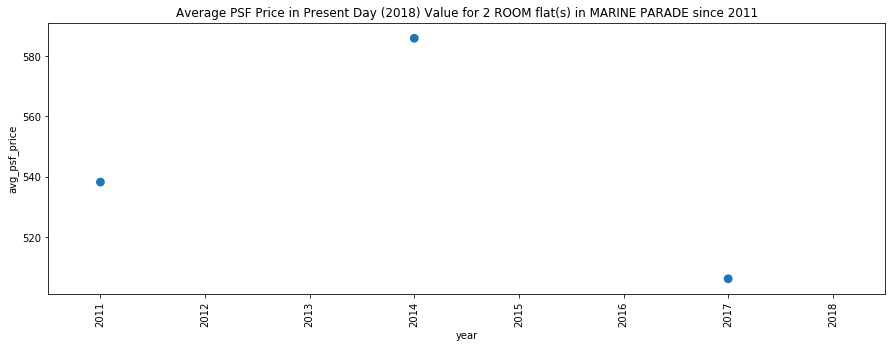

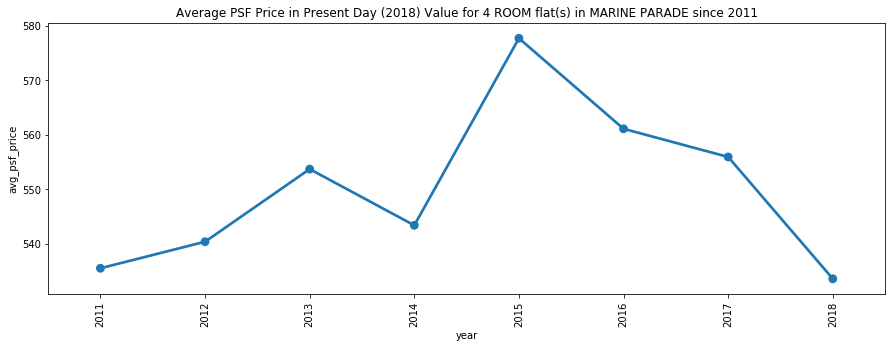

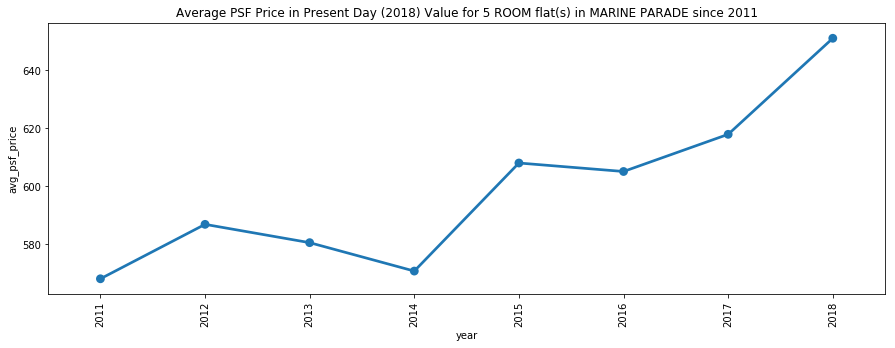

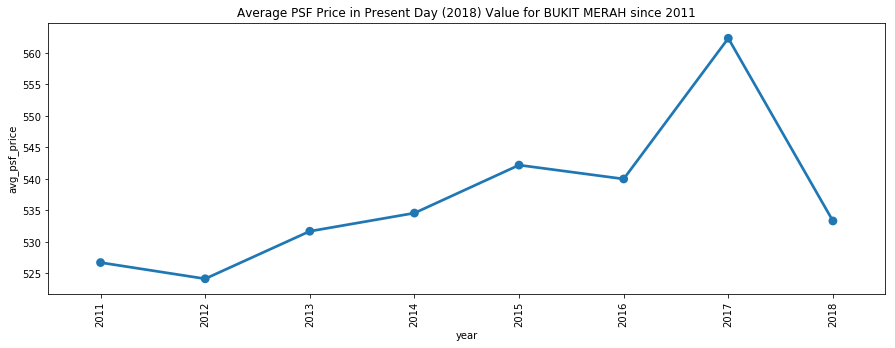

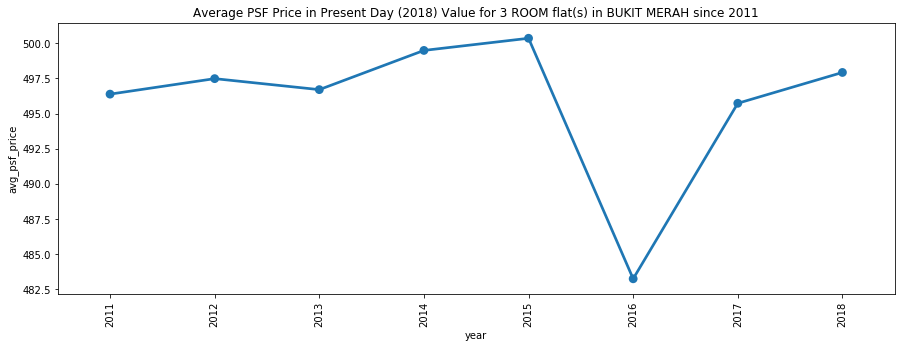

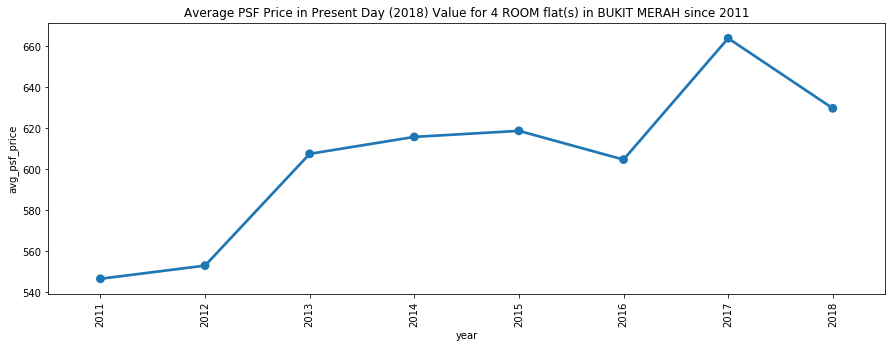

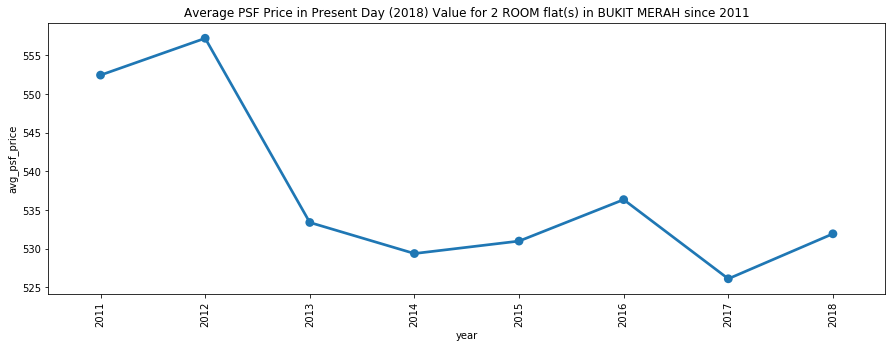

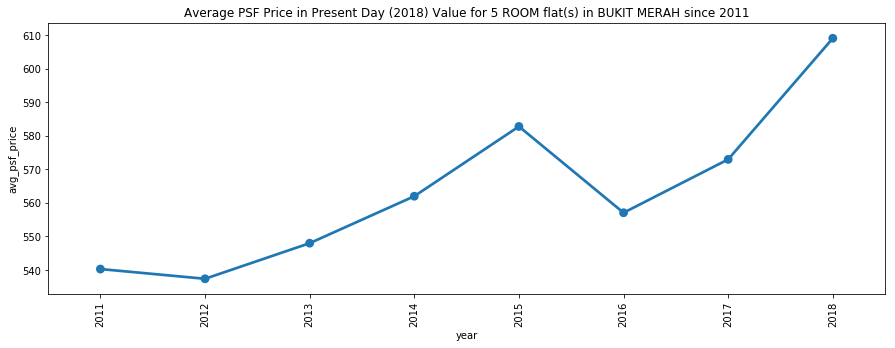

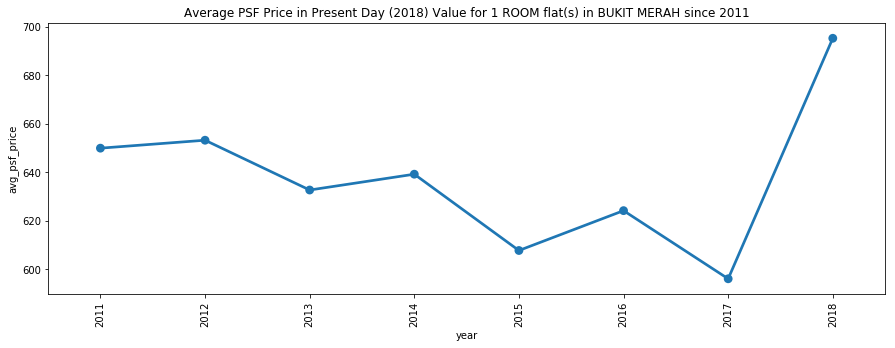

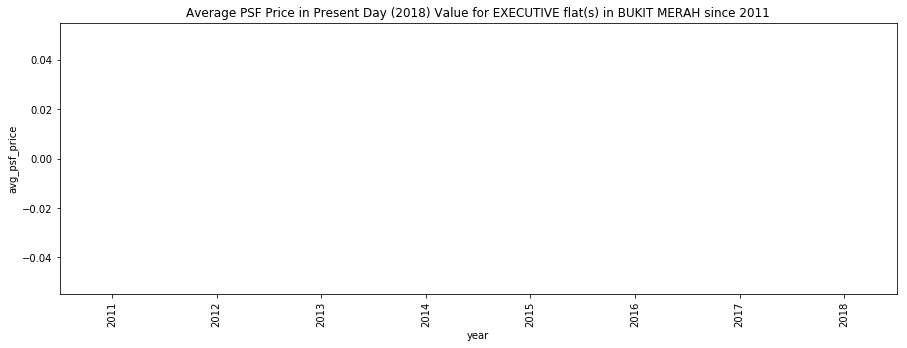

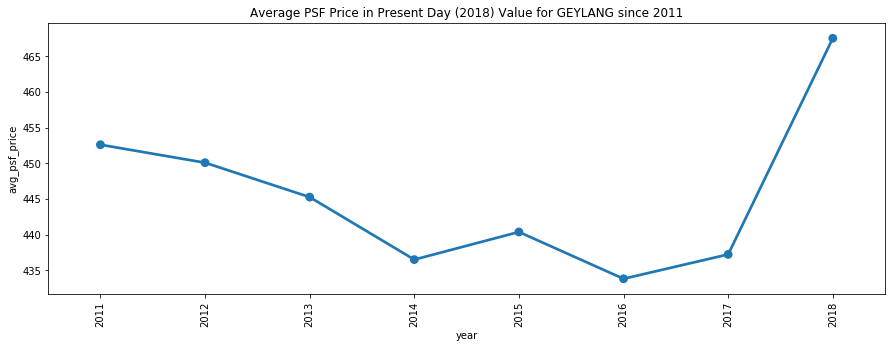

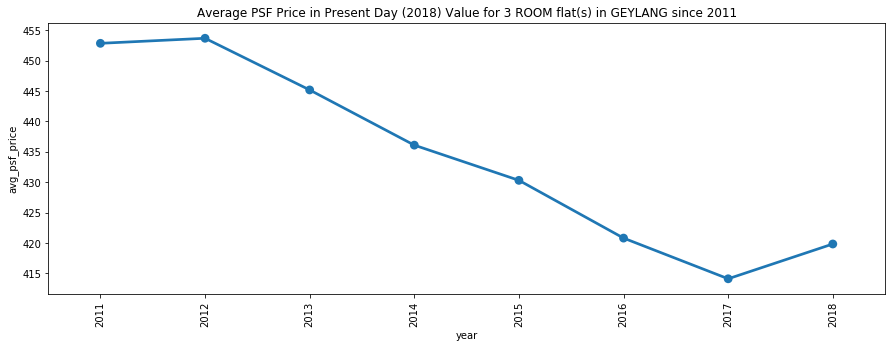

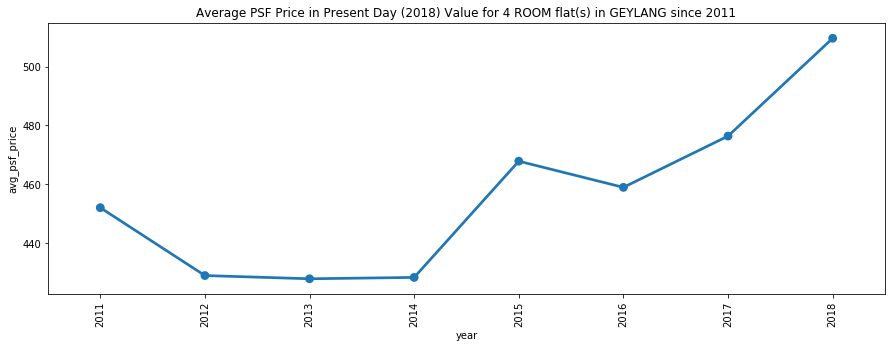

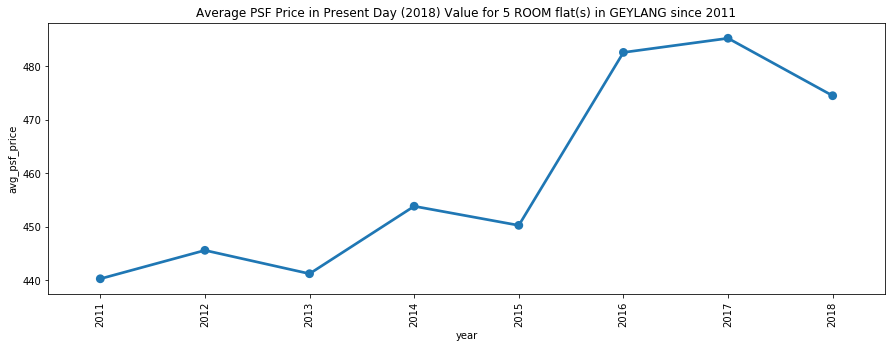

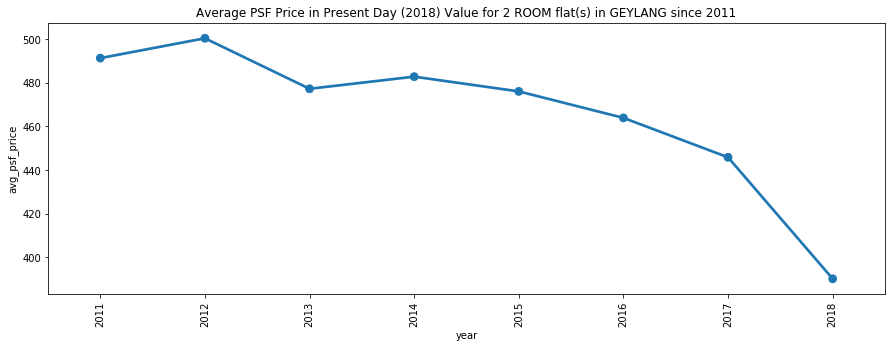

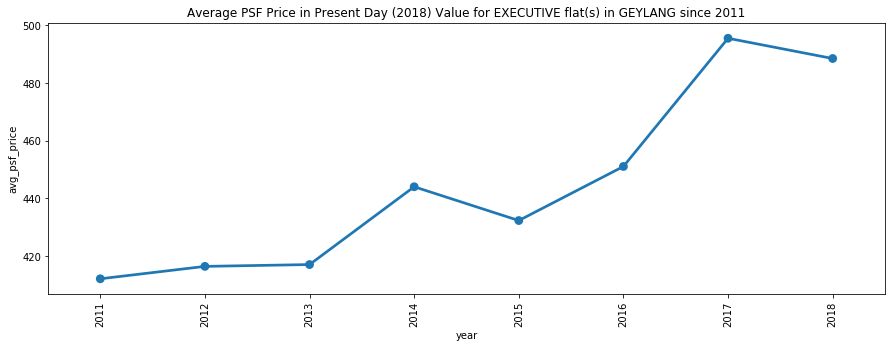

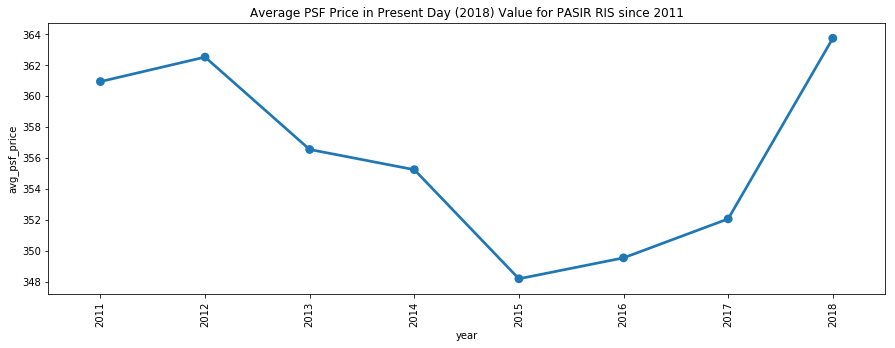

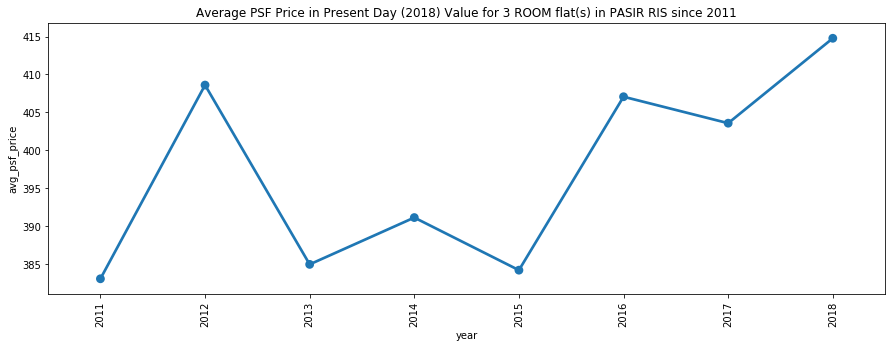

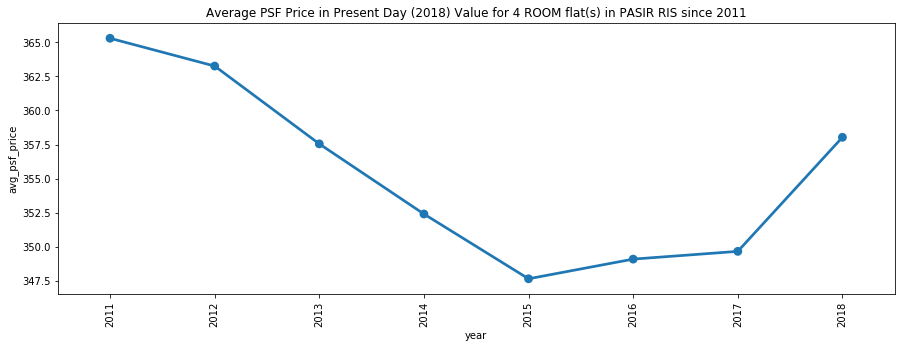

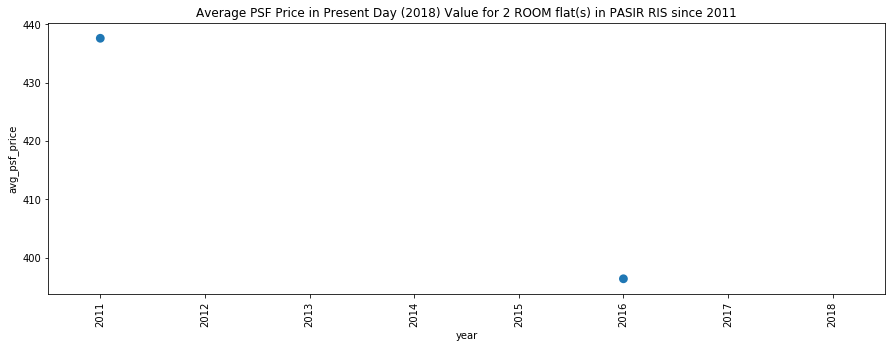

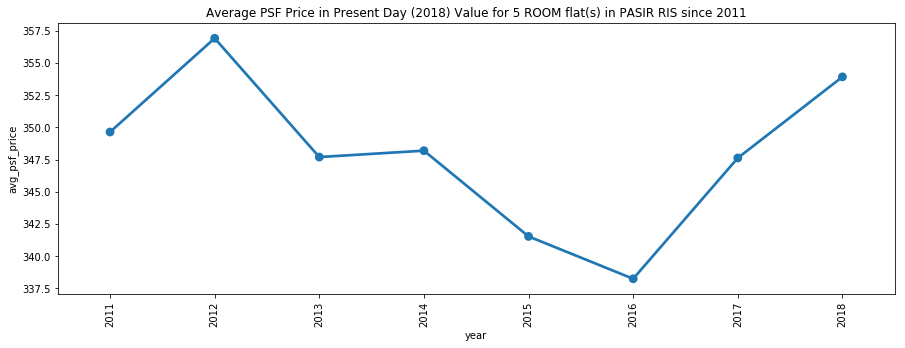

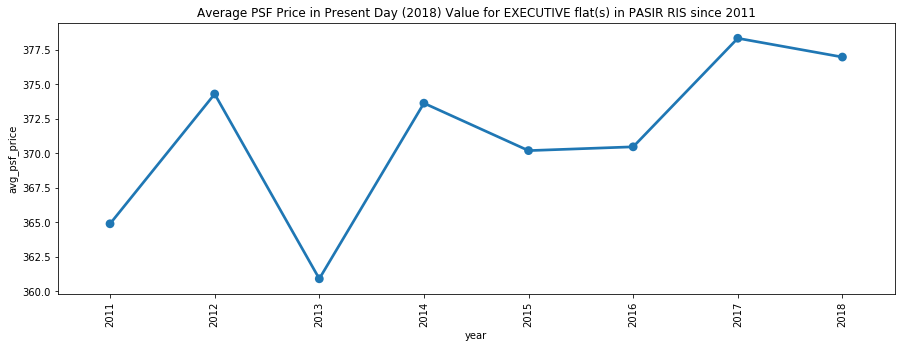

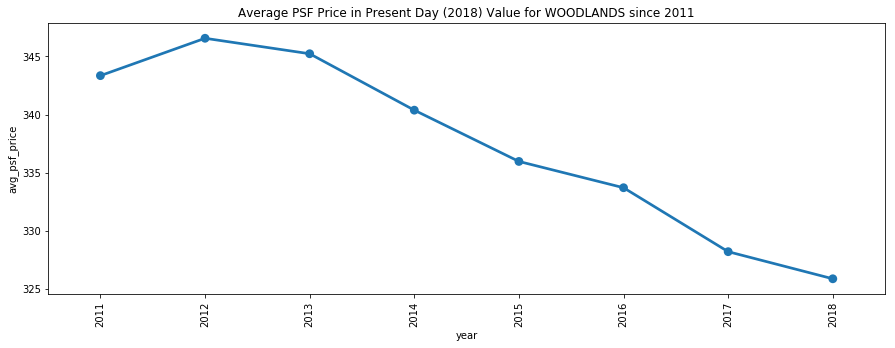

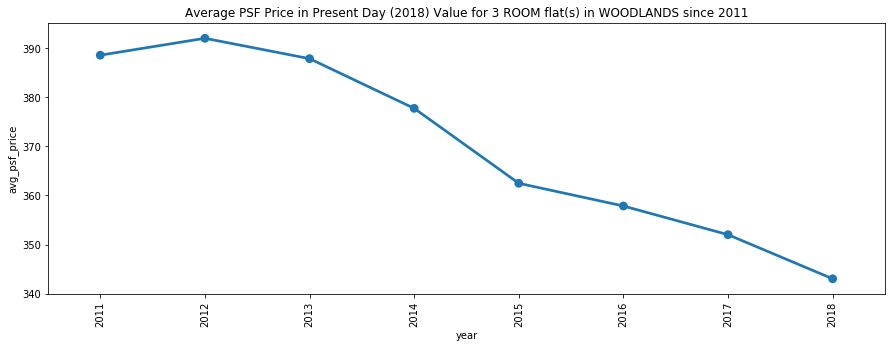

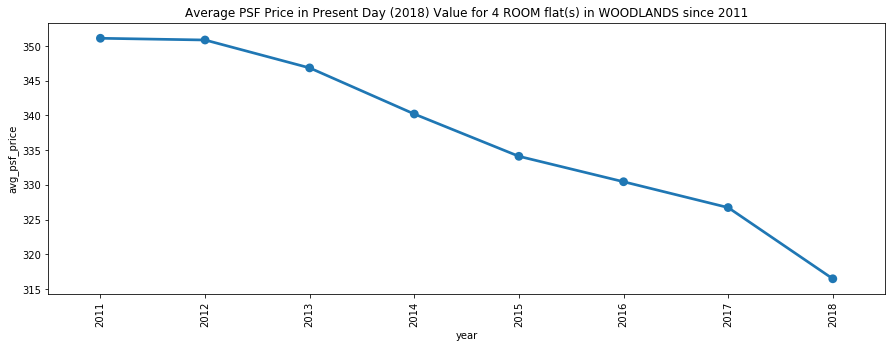

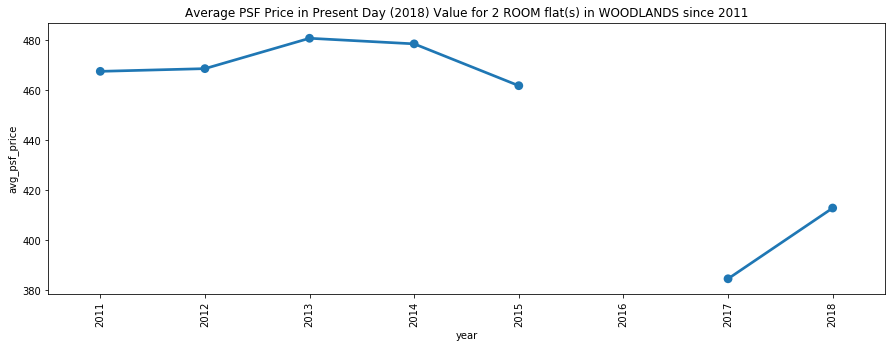

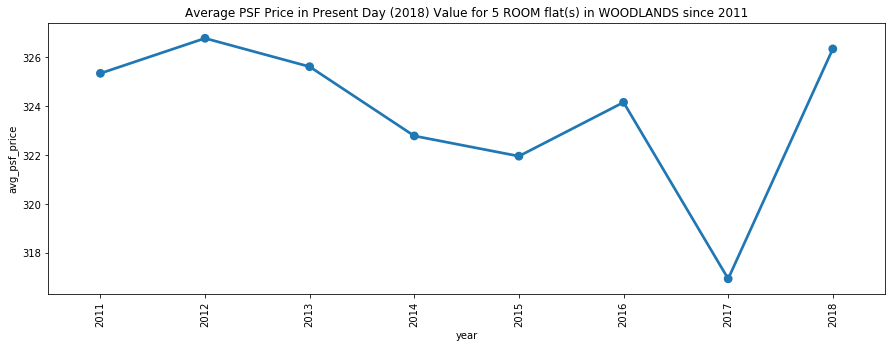

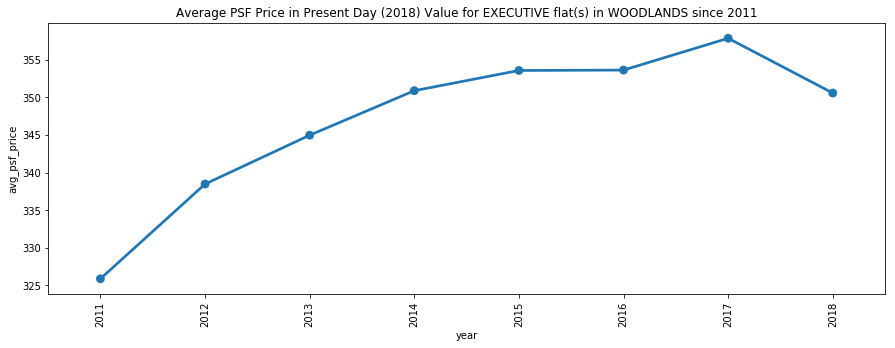

In [36]:
for each_town in all_towns:
    
    # Generate a PSF price for each town
    avg_psf_price_by_year = pd.DataFrame(columns=['year', 'avg_psf_price'])

    for each_year in range(2011, 2019):
        avg_psf_price_for_year = resale_data.loc[(resale_data['town'] == each_town) & (resale_data['year'] == each_year)]['psf_price_adj_2018'].median()
        _temp_df = pd.DataFrame([[each_year, avg_psf_price_for_year]], columns=['year', 'avg_psf_price'])
        avg_psf_price_by_year = avg_psf_price_by_year.append(_temp_df)

    avg_psf_price_by_year.sort_values(by=['avg_psf_price'], inplace=True)

    fig, axs = plt.subplots(figsize=(15,5))
    x = sns.pointplot(x='year', y='avg_psf_price', data=avg_psf_price_by_year).set_title('Average PSF Price in Present Day (2018) Value for ' + each_town + ' since 2011')
    for item in axs.get_xticklabels():
        item.set_rotation(90)
        
    # Generate a PSF price for each town, for each room type (e.g. 1 room, 2 room, 3 room...)
    flat_types = list(set(resale_data.loc[(resale_data['town'] == each_town)]['flat_type']))
    
    for each_flat_type in flat_types:
        avg_psf_price_rm_type_by_year = pd.DataFrame(columns=['year', 'avg_psf_price'])

        for each_year in range(2011, 2019):
            avg_psf_price_rm_type_for_year = resale_data.loc[(resale_data['town'] == each_town) & (resale_data['year'] == each_year) & (resale_data['flat_type'] == each_flat_type)]['psf_price_adj_2018'].median()
            _temp_df = pd.DataFrame([[each_year, avg_psf_price_rm_type_for_year]], columns=['year', 'avg_psf_price'])
            avg_psf_price_rm_type_by_year = avg_psf_price_rm_type_by_year.append(_temp_df)

        avg_psf_price_rm_type_by_year.sort_values(by=['avg_psf_price'], inplace=True)

        fig, axs = plt.subplots(figsize=(15,5))
        x = sns.pointplot(x='year', y='avg_psf_price', data=avg_psf_price_rm_type_by_year).set_title('Average PSF Price in Present Day (2018) Value for ' + each_flat_type + ' flat(s) in ' + each_town + ' since 2011')
        for item in axs.get_xticklabels():
            item.set_rotation(90)

## Highest PSF price for each street in each town in present value (2018) for 2018

c:\users\nelgoh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


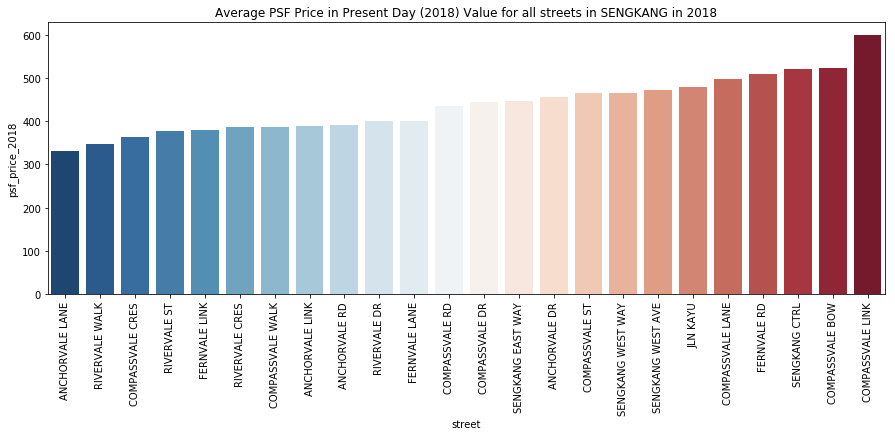

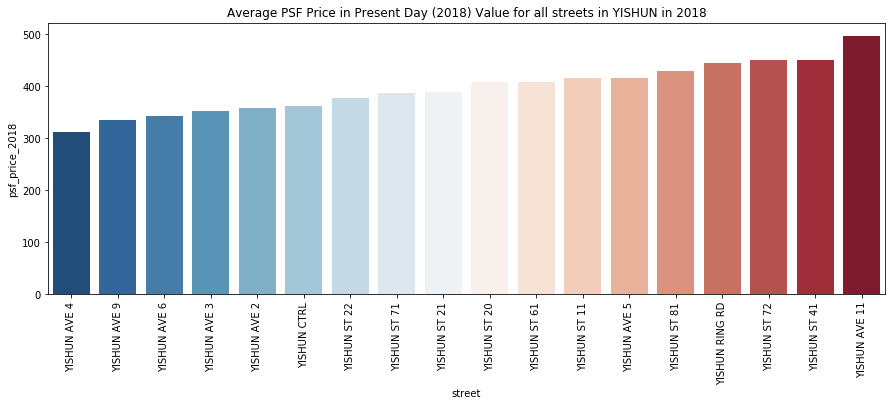

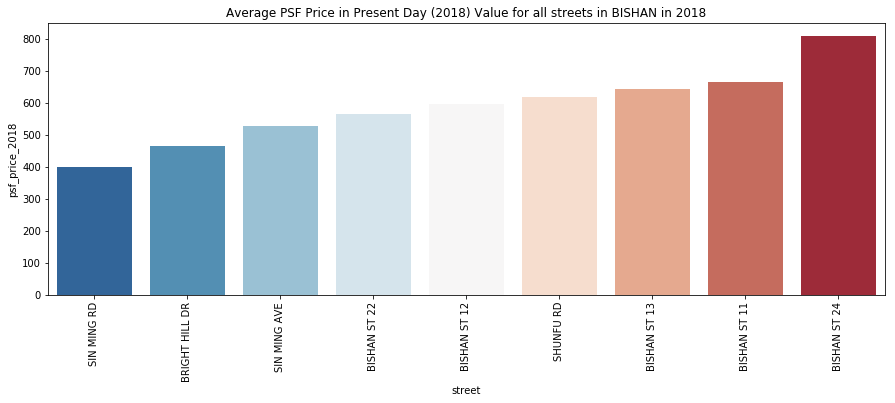

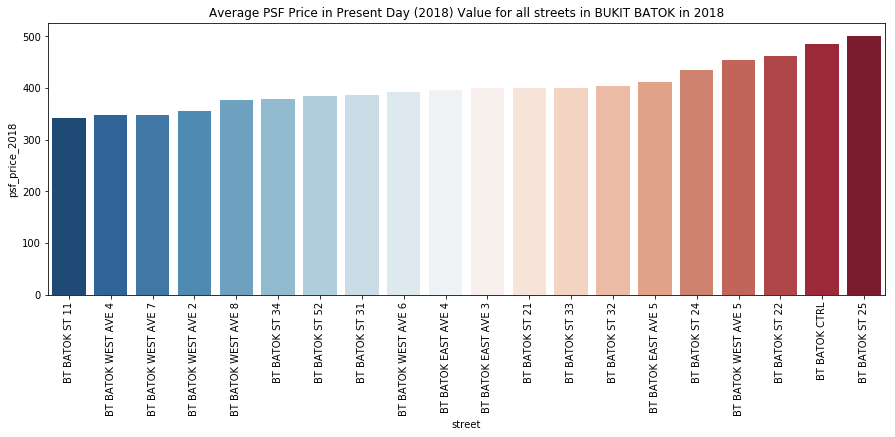

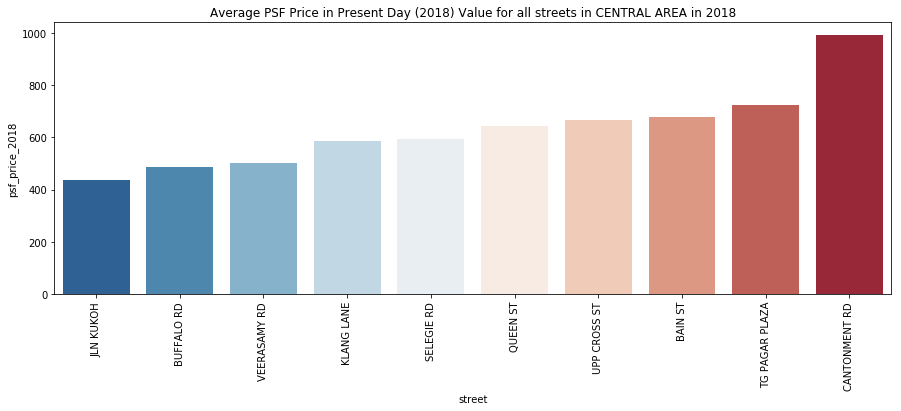

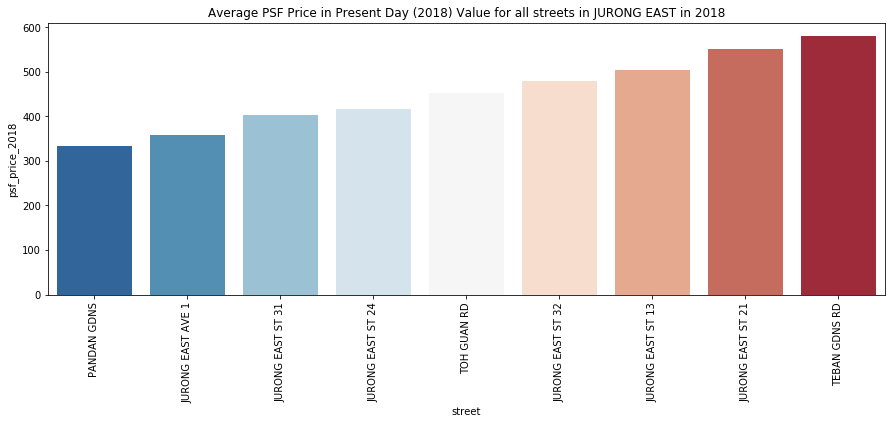

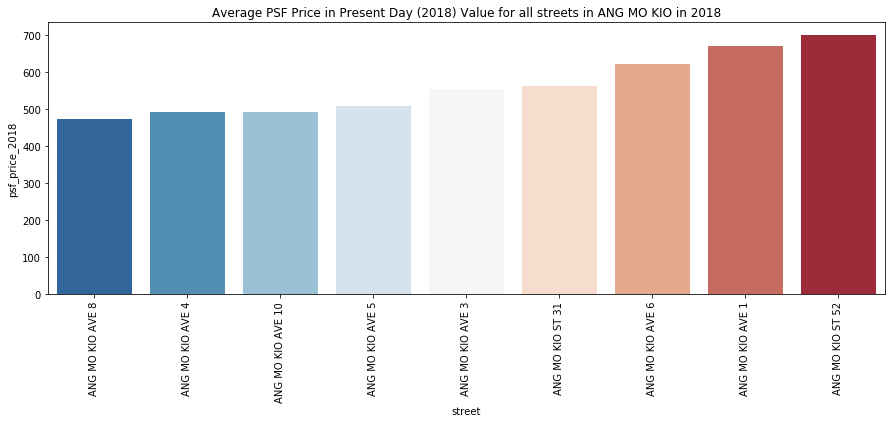

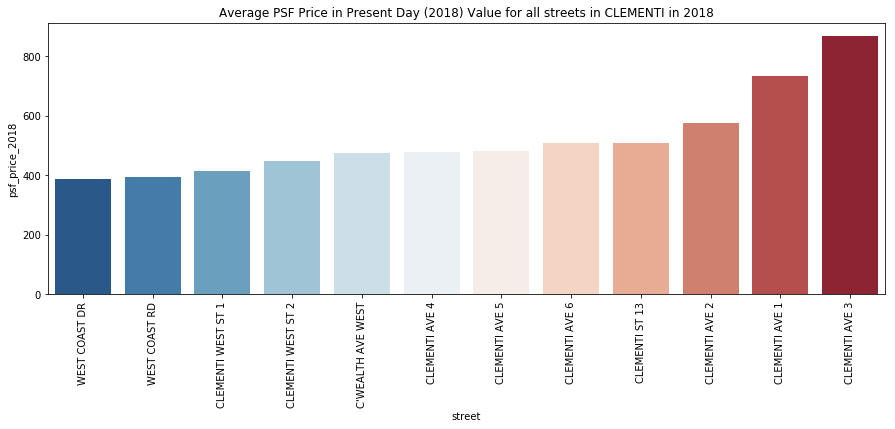

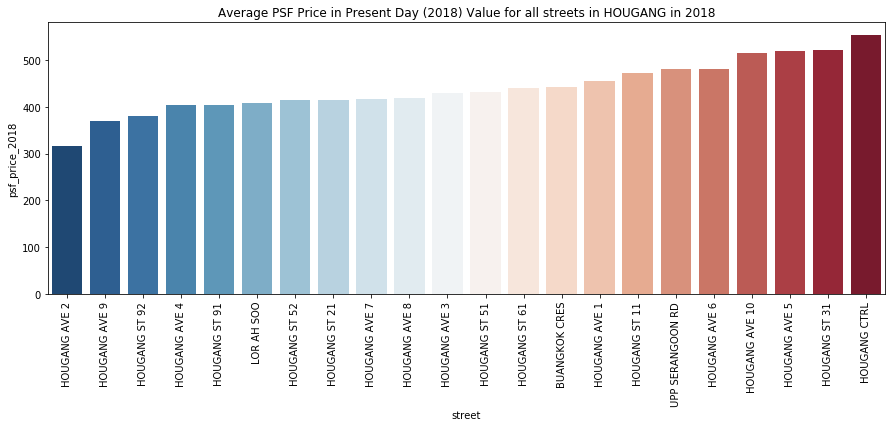

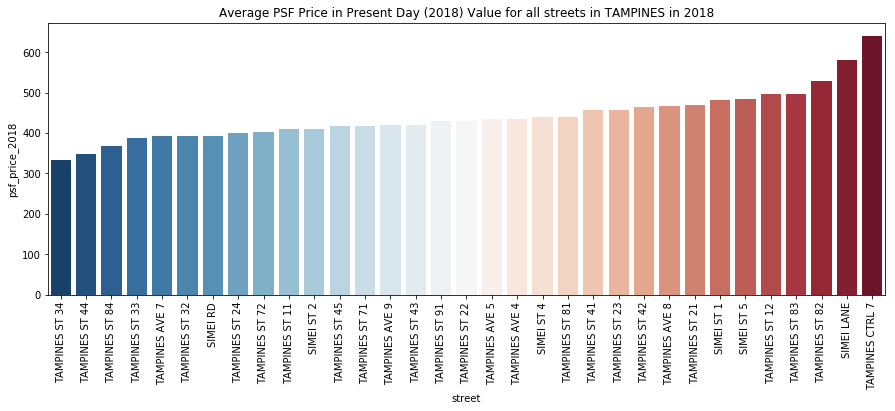

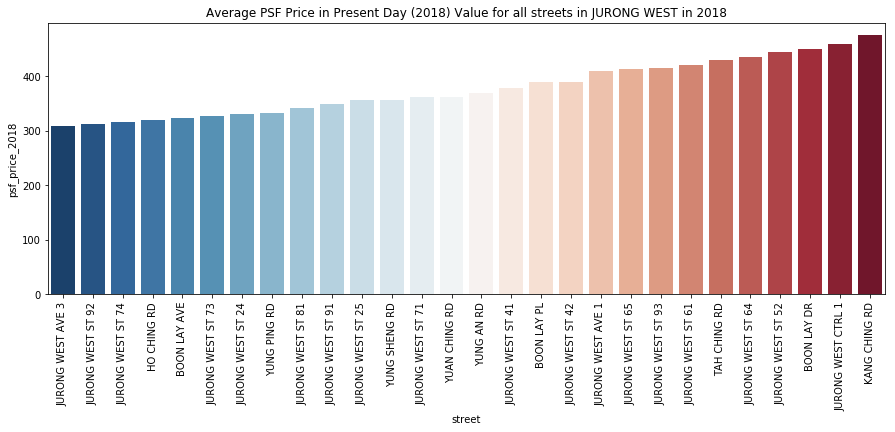

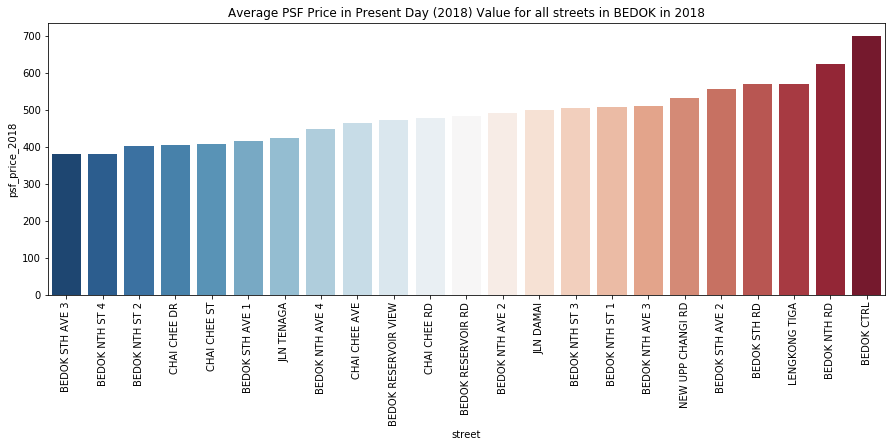

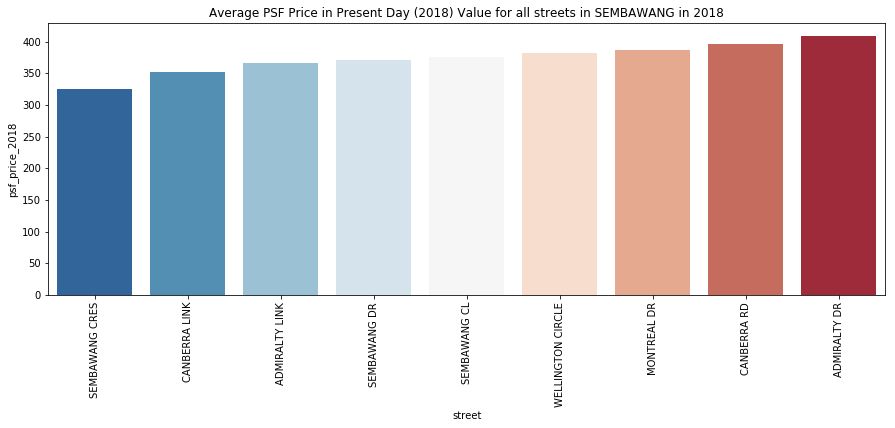

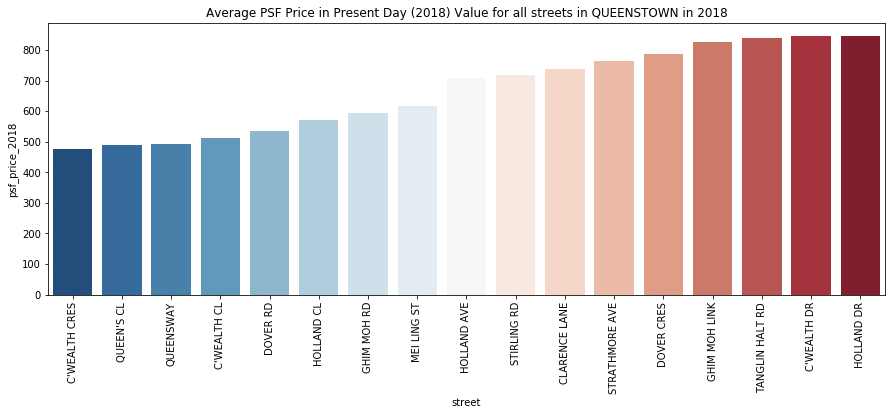

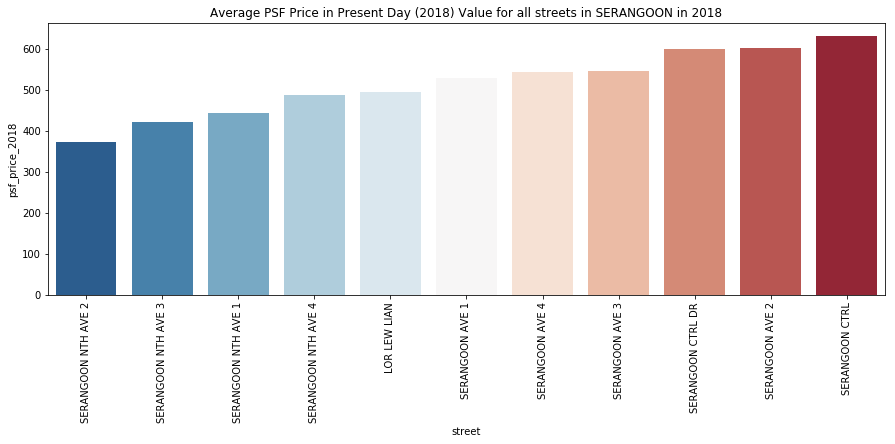

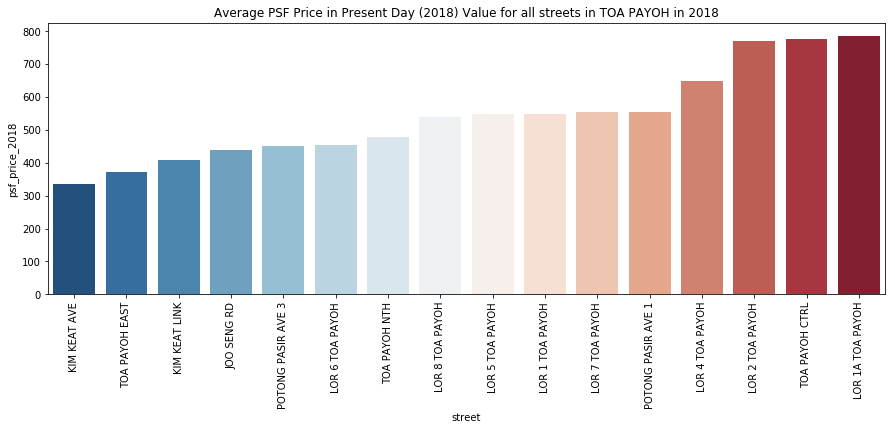

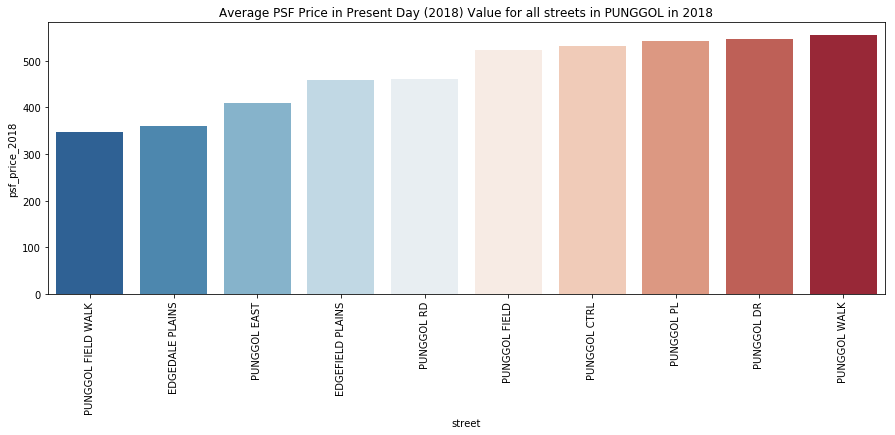

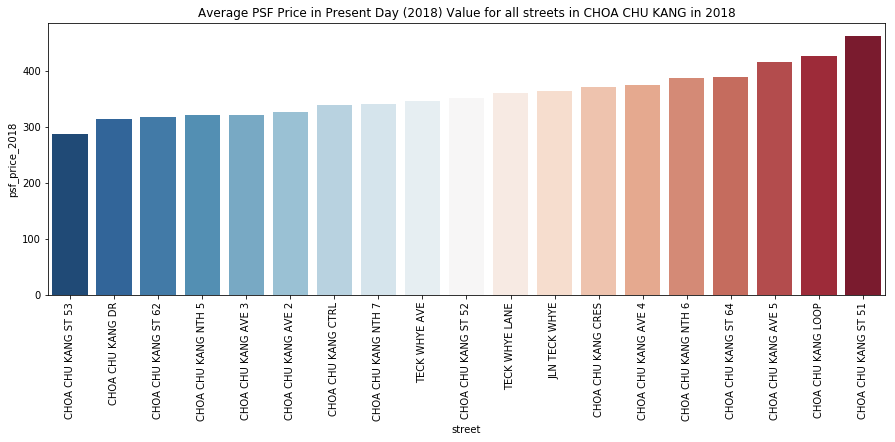

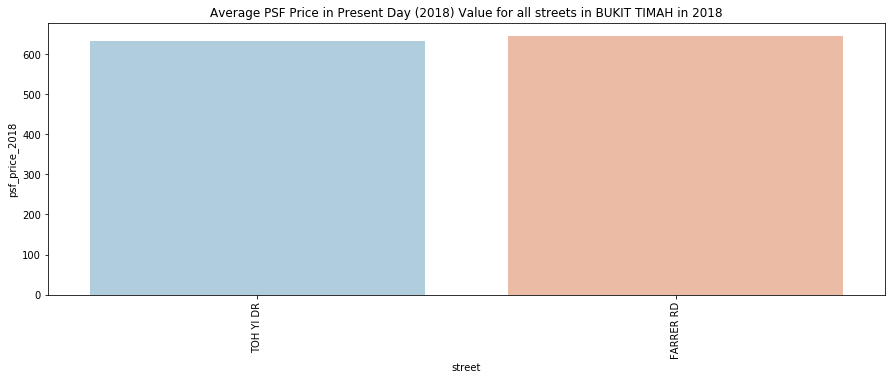

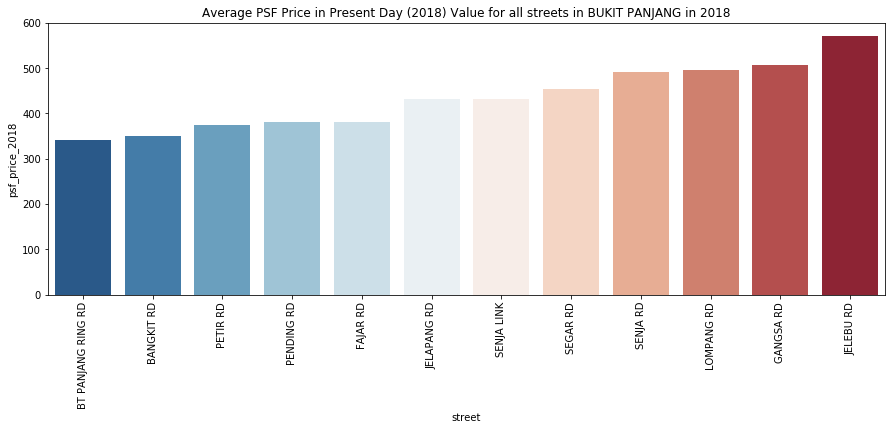

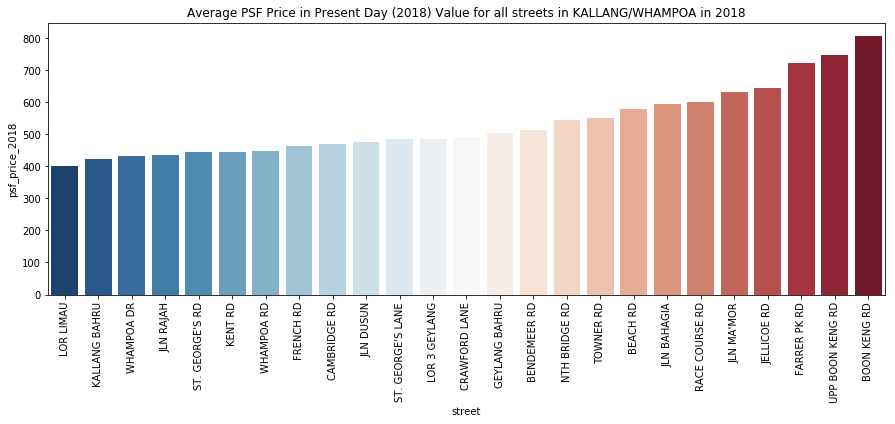

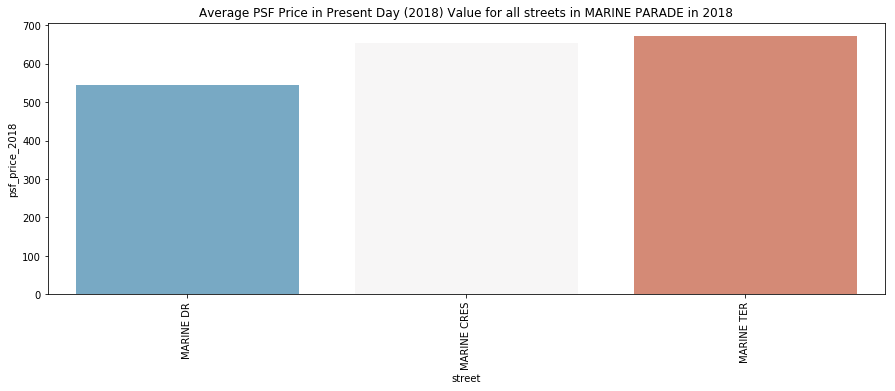

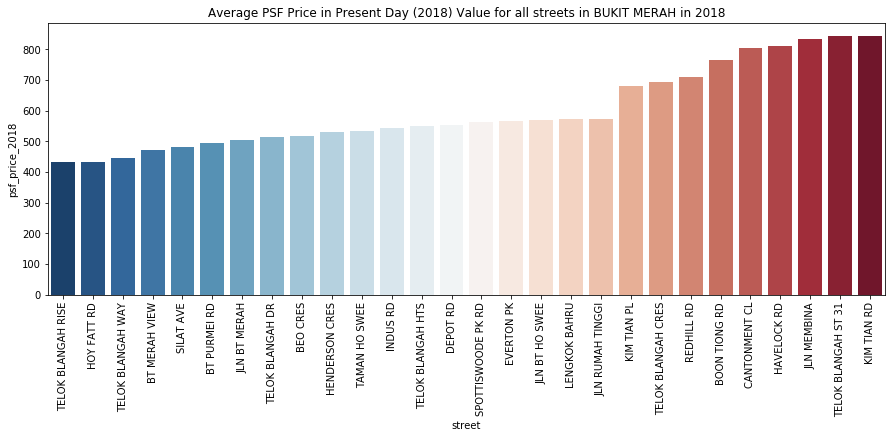

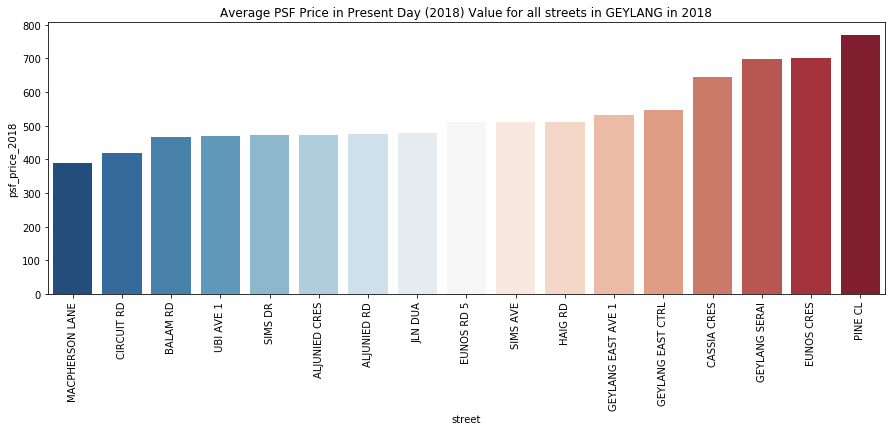

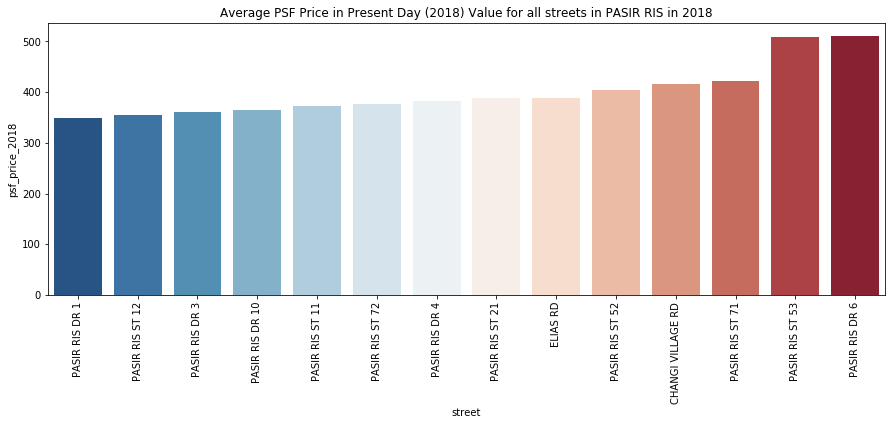

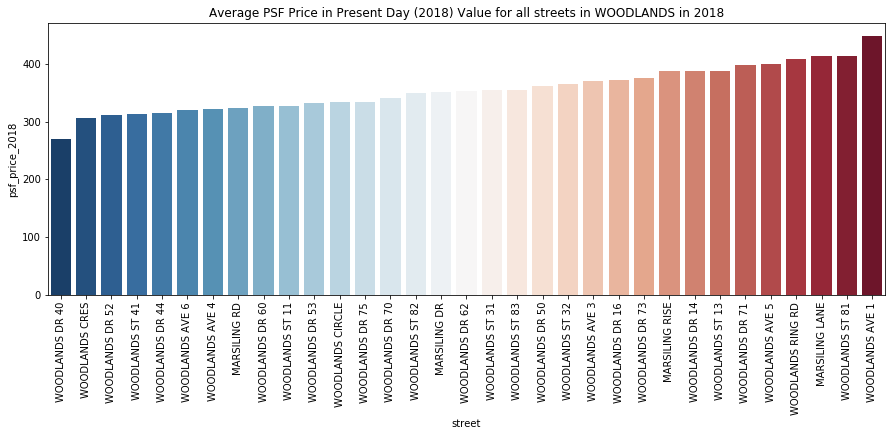

In [41]:
for each_town in all_towns:
    # Create a Dataframe to store the highest PSFs for each town
    highest_psf_price_by_street = pd.DataFrame(columns=['street', 'psf_price_2018'])
    
    all_streets = set(list(resale_data.loc[(resale_data['town'] == each_town) & (resale_data['year'] == 2018)]['street_name'].values))
    for each_street in all_streets:
        highest_psf_price_for_street = resale_data.loc[(resale_data['town'] == each_town) & (resale_data['street_name'] == each_street) & (resale_data['year'] == 2018)]['psf_price_adj_2018'].max()
        _temp_df = pd.DataFrame([[each_street, highest_psf_price_for_street]], columns=['street', 'psf_price_2018'])
        highest_psf_price_by_street = highest_psf_price_by_street.append(_temp_df)
        
    highest_psf_price_by_street.sort_values(by=['psf_price_2018'], inplace=True)
    
    if (len(highest_psf_price_by_street) != 0):
        fig, axs = plt.subplots(figsize=(15,5))
        x = sns.barplot(x='street', y='psf_price_2018', data=highest_psf_price_by_street, palette=sns.color_palette('RdBu_r', len(set(highest_psf_price_by_street['street'])))).set_title('Average PSF Price in Present Day (2018) Value for all streets in ' + each_town + ' in 2018')
        for item in axs.get_xticklabels():
            item.set_rotation(90)

In [44]:
resale_data.loc[(resale_data['street_name'] == 'BISHAN ST 13') & (resale_data['year'] == 2018)]

Unnamed: 0  month    town flat_type block   street_name storey_range  \
767649      767649      1  BISHAN    4 ROOM   197  BISHAN ST 13     07 TO 09   
767655      767655      1  BISHAN    5 ROOM   183  BISHAN ST 13     13 TO 15   
768733      768733      2  BISHAN    4 ROOM   172  BISHAN ST 13     07 TO 09   
768739      768739      2  BISHAN    5 ROOM   164  BISHAN ST 13     04 TO 06   
768740      768740      2  BISHAN    5 ROOM   183  BISHAN ST 13     01 TO 03   

        floor_area_sqm  flat_model  lease_commence_date  resale_price  year  \
767649              84  SIMPLIFIED                 1987        543000  2018   
767655             121    IMPROVED                 1987        836000  2018   
768733              83  SIMPLIFIED                 1987        478000  2018   
768739             131    IMPROVED                 1988        730000  2018   
768740             121    IMPROVED                 1987        670000  2018   

        2018_price_value  psf_price_adj_2018  
767649          543000.0          600.552375  
767655          836000.0          641.876170  
768733          478000.0          535.032483  
768739          730000.0          517.704464  
768740          670000.0          514.422290